# *In the name of God, the Most Gracious, the Most Merciful*

---------

----------

## Who is at risk for cardiovascular disease?
*A blood test that can save lives*

by: Abdelrahman Zamzam

-----

### *The CRoss Industry Standard Process for Data Mining (CRISP-DM) will be used throughout this project.*

## 1. Business understanding – What does the business need?

### 1.1 Introduction

Cardiovascular disease (CVD) is considered a general term for conditions that affects the heart or blood vessels. CVDs are highly prevalent globally and are known to be associated with an accumulation of fatty deposits inside the arteries and an increased risk of blood clots. Inadequate management of CVDs can lead to catastrophic consequences, including nonfatal coronary or cerebral vascular events, lower-limb amputations, and death.

Patients managed at early CVD stage see improvements in their lifestyle and avoid unfavorable complications. Moreover, a delayed diagnosis of CVD can threaten prognosis, and overwhelm the healthcare system economically.

The challenge is identifying those patients at early stages of CVD. As a significant number of patients with CVD are either undiagnosed, misdiagnosed, or diagnosed at late disease stage, putting them at an increased risk of morbidity and mortality.

An urgent need for a convenient and reliable risk assessment tool that can be utilized to classify patients who are at risk of CVD. 

With the help of advanced technology, scientists have noticed that some blood biomarkers (i.e., plasma proteins) are elevated at early stages of CVD. However, these plasma proteins are still under considerable research as they are not very specific to a single CVD. Also, other factors such as smoking, and age can affect both the levels of plasma proteins and CVD status. These factors are referred to as confounding features.

The objective of this project is to present a model that can classify patients with high risk of developing CVD given their plasma proteins levels and other confounding features.

It is important to note that outcome 8, is the project primary outcome. Hence, I will be building my models based on this outcome first. Then I will follow the analysis for the remaining secondary outcomes. 



**Note: The data used in this project was collected retrospectively from patients. For ethical purposes, protein and outcome names will be coded with sequential numbering.**

-----------

--------

## 2. Data understanding – What data do we have / need? Is it clean?

### 2.1 Loading the required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score,ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import plot_confusion_matrix, roc_curve, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})
# Increases the font size of sns plots
sns.set(font_scale = 2)

--------

### 2.2 Reading the Raw Data into Python From CSV

In [2]:
data = pd.read_csv('data/project.csv', index_col=0)

--------

### 2.3 Data Pre-Processing

Using data.shape, data.columns, data.head(),and data.info() to get an understanding of the dataset.

In [3]:
data.shape

(917, 25)

In [4]:
data.columns

Index(['protein1', 'protein2', 'protein3', 'protein4', 'protein5', 'age',
       'sex', 'hypetension', 'hypercholesterolemia', 'diabetes', 'smoking',
       'congestive heat failue', 'conay atey disease', 'stoke', 'statin',
       'aspirin', 'outcome1', 'outcome2', 'outcome3', 'outcome4', 'outcome5',
       'outcome6', 'outcome7', 'outcome8', 'outcome9'],
      dtype='object')

In [5]:
data.head()

protein1  protein2  protein3  protein4  protein5  age     sex  \
id                                                                   
894     12.20      3.47      0.34      5.44      2.34   75    Male   
914      9.33      0.29      1.05      1.00      9.33   80    Male   
716      9.32      1.61      7.83      0.09      1.91   60  Female   
724      9.32      2.30      0.18      1.20      1.84   56    Male   
365      9.02      4.47      0.13     12.00      7.51   81  Female   

    hypetension hypercholesterolemia diabetes  ... aspirin outcome1 outcome2  \
id                                             ...                             
894         Yes                   No      Yes  ...      No        1        0   
914          No                  NaN      Yes  ...      No        1        1   
716         Yes                   No       No  ...      No        1        0   
724         Yes                  Yes       No  ...     Yes        1        0   
365         Yes                   No      Yes  ...      No        1        0   

    outcome3 outcome4 outcome5  outcome6  outcome7  outcome8  outcome9  
id                                                                      
894        0        1        0         1         1         1         1  
914        0        0        1         1         1         1         0  
716        0        0        0         1         1         1         0  
724        0        0        0         1         1         1         0  
365        1        0        0         1         1         1         0  

[5 rows x 25 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 894 to 322
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   protein1                917 non-null    float64
 1   protein2                917 non-null    float64
 2   protein3                917 non-null    float64
 3   protein4                917 non-null    float64
 4   protein5                917 non-null    float64
 5   age                     917 non-null    int64  
 6   sex                     913 non-null    object 
 7   hypetension             917 non-null    object 
 8   hypercholesterolemia    909 non-null    object 
 9   diabetes                913 non-null    object 
 10  smoking                 917 non-null    object 
 11  congestive heat failue  901 non-null    object 
 12  conay atey disease      898 non-null    object 
 13  stoke                   870 non-null    object 
 14  statin                  917 non-null    

In [7]:
data.describe()

protein1    protein2    protein3    protein4    protein5         age  \
count  917.000000  917.000000  917.000000  917.000000  917.000000  917.000000   
mean     1.352999    4.522585    1.221821    7.994842    2.885027   67.724100   
std      1.499135    3.616671    2.849974   13.949112    1.838336   11.831846   
min      0.010000    0.020000    0.010000    0.060000    0.110000   24.000000   
25%      0.260000    2.100000    0.270000    0.630000    1.660000   61.000000   
50%      0.840000    3.500000    0.490000    2.360000    2.500000   69.000000   
75%      2.000000    5.670000    1.040000    8.210000    3.670000   76.000000   
max     12.200000   21.060000   30.100000   94.820000    9.930000   98.000000   

         outcome1    outcome2    outcome3    outcome4    outcome5    outcome6  \
count  917.000000  917.000000  917.000000  917.000000  917.000000  917.000000   
mean     0.178844    0.121047    0.033806    0.040349    0.023991    0.179935   
std      0.383431    0.326360    0.180828    0.196884    0.153105    0.384343   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         outcome7    outcome8    outcome9  
count  917.000000  917.000000  917.000000  
mean     0.236641    0.462377    0.201745  
std      0.425252    0.498855    0.401522  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000

In [8]:
#renaming some of the columns for easier processing
data.rename(columns = {'stoke':'stroke'}, inplace = True)
data.rename(columns = {'conay atey disease':'coronary artery disease'}, inplace = True)
data.rename(columns = {'congestive heat failue':'congestive heart failure'}, inplace = True)
data.rename(columns = {'hypetension':'hypertension'}, inplace = True)

The features explanation are as follows:

- Age: The age of the patient at which the blood sample was withdrawn

- Sex: Male / Female

- Hypertension: Consistent systolic: 130 mm Hg or higher; diastolic: 80 mm Hg or higher (Yes / No)

- Hypocholesteremia: Total cholesterol of 240 mg/dL or higher ( Yes / No)

- Diabetes: Fasting blood sugar test 126 mg/dL (7 mmol/L) or higher on two separate tests is diagnosed as diabetes.  (Yes / No)

- Smoking: Regular smoker (Yes / No)

- Congestive heart failure: History of any congestive heart failure (Yes / No)

- Coronary artery disease: History of any coronary artery disease (Yes / No)

- Stroke: History of stroke (Yes / No)

- Statin: Currently taking statin as medication (Yes / No)

- Aspirin: Currently taking aspirin as medication (Yes / No)

In [9]:
#checking percentage of missing values in each column
((data.isnull().sum() / len(data))*100).sort_values(ascending=False)

stroke                      5.125409
coronary artery disease     2.071974
congestive heart failure    1.744820
hypercholesterolemia        0.872410
sex                         0.436205
diabetes                    0.436205
aspirin                     0.000000
outcome8                    0.000000
outcome7                    0.000000
outcome6                    0.000000
outcome5                    0.000000
outcome4                    0.000000
outcome3                    0.000000
outcome2                    0.000000
outcome1                    0.000000
protein1                    0.000000
statin                      0.000000
protein2                    0.000000
smoking                     0.000000
hypertension                0.000000
age                         0.000000
protein5                    0.000000
protein4                    0.000000
protein3                    0.000000
outcome9                    0.000000
dtype: float64

#### Comments: Since all missing values for columns are below 40%, I decided to use simple imputer from sklearn to impute categorical variables using the most frequent observation for stroke,coronary artery disease,congestive heart failure,hypertension,hypercholesterolemia,sex, and diabetes

In [10]:
#imputing categorical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(data[['stroke','coronary artery disease','congestive heart failure','hypertension','hypercholesterolemia','sex','diabetes']])
data[['stroke','coronary artery disease','congestive heart failure','hypertension','hypercholesterolemia','sex','diabetes']] = \
imputer.transform(data[['stroke','coronary artery disease','congestive heart failure','hypertension','hypercholesterolemia','sex','diabetes']])

#checking percentage of missing values in each column one more time
((data.isnull().sum() / len(data))*100).sort_values(ascending=False)

protein1                    0.0
stroke                      0.0
outcome8                    0.0
outcome7                    0.0
outcome6                    0.0
outcome5                    0.0
outcome4                    0.0
outcome3                    0.0
outcome2                    0.0
outcome1                    0.0
aspirin                     0.0
statin                      0.0
coronary artery disease     0.0
protein2                    0.0
congestive heart failure    0.0
smoking                     0.0
diabetes                    0.0
hypercholesterolemia        0.0
hypertension                0.0
sex                         0.0
age                         0.0
protein5                    0.0
protein4                    0.0
protein3                    0.0
outcome9                    0.0
dtype: float64

#### Comments: The dataset I am working with was collected retrospectively from 917 patient. For each patient a total of 5 plasma protein levels were measured using standardized methodology and within a specified blood collection window. Along with the protein levels, 12 clinical features were retrieved for each patient. Finally, nine different and CVDs (i.e., outcomes) were measured for each patient. The outcomes are labeled “0” for outcome absent and “1” for outcome present.

--------

### 2.4 Data visualization

In [11]:
# Viewing value counts for the outcomes

outcomes = data[['outcome1', 'outcome2', 'outcome3', 'outcome4', 'outcome5',
       'outcome6', 'outcome7', 'outcome8','outcome9']]

for c in outcomes.columns:
    print ("---- %s ---" % c)
    print (outcomes[c].value_counts())
    print("")

---- outcome1 ---
0    753
1    164
Name: outcome1, dtype: int64

---- outcome2 ---
0    806
1    111
Name: outcome2, dtype: int64

---- outcome3 ---
0    886
1     31
Name: outcome3, dtype: int64

---- outcome4 ---
0    880
1     37
Name: outcome4, dtype: int64

---- outcome5 ---
0    895
1     22
Name: outcome5, dtype: int64

---- outcome6 ---
0    752
1    165
Name: outcome6, dtype: int64

---- outcome7 ---
0    700
1    217
Name: outcome7, dtype: int64

---- outcome8 ---
0    493
1    424
Name: outcome8, dtype: int64

---- outcome9 ---
0    732
1    185
Name: outcome9, dtype: int64



#### Comments: The study primary outcome (outcome 8) looks to be balanced well. However, the outcomes are unbalanced. This might cause some problems further into the analysis stage.

<AxesSubplot:>

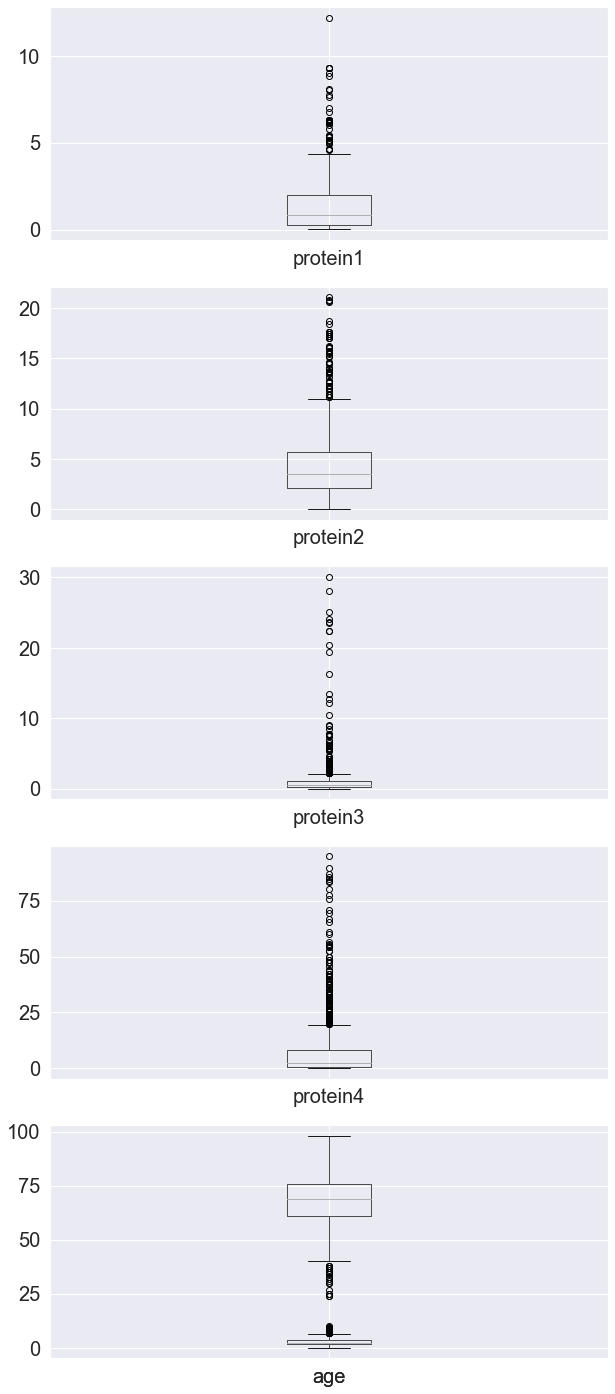

In [12]:
# Building box plots to access the distribution of the continuous variables
plt.subplots(figsize=(10,30))
plt.subplot(611)
data.boxplot('protein1', fontsize=20)
plt.subplot(612)
data.boxplot('protein2',fontsize=20 )
plt.subplot(613)
data.boxplot('protein3',fontsize=20 )
plt.subplot(614)
data.boxplot('protein4',fontsize=20 )
plt.subplot(615)
data.boxplot('protein5',fontsize=20 )
plt.subplot(615)
data.boxplot('age',fontsize=20 )


#### Comments:  The boxplot below shows the non-normal distribtuion for proteins and age values.

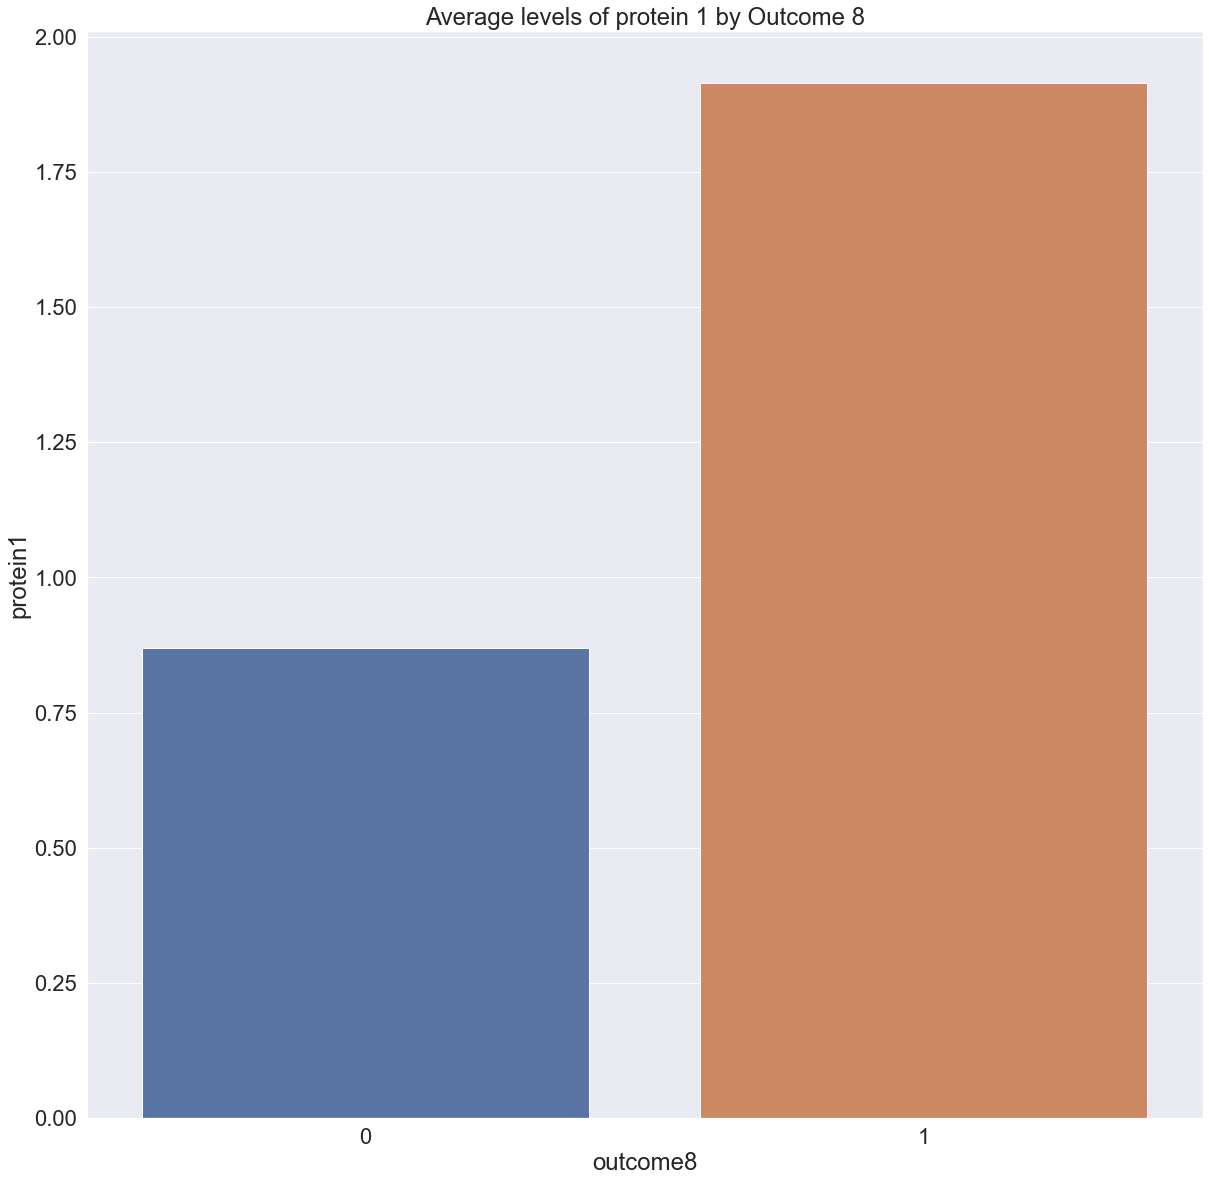

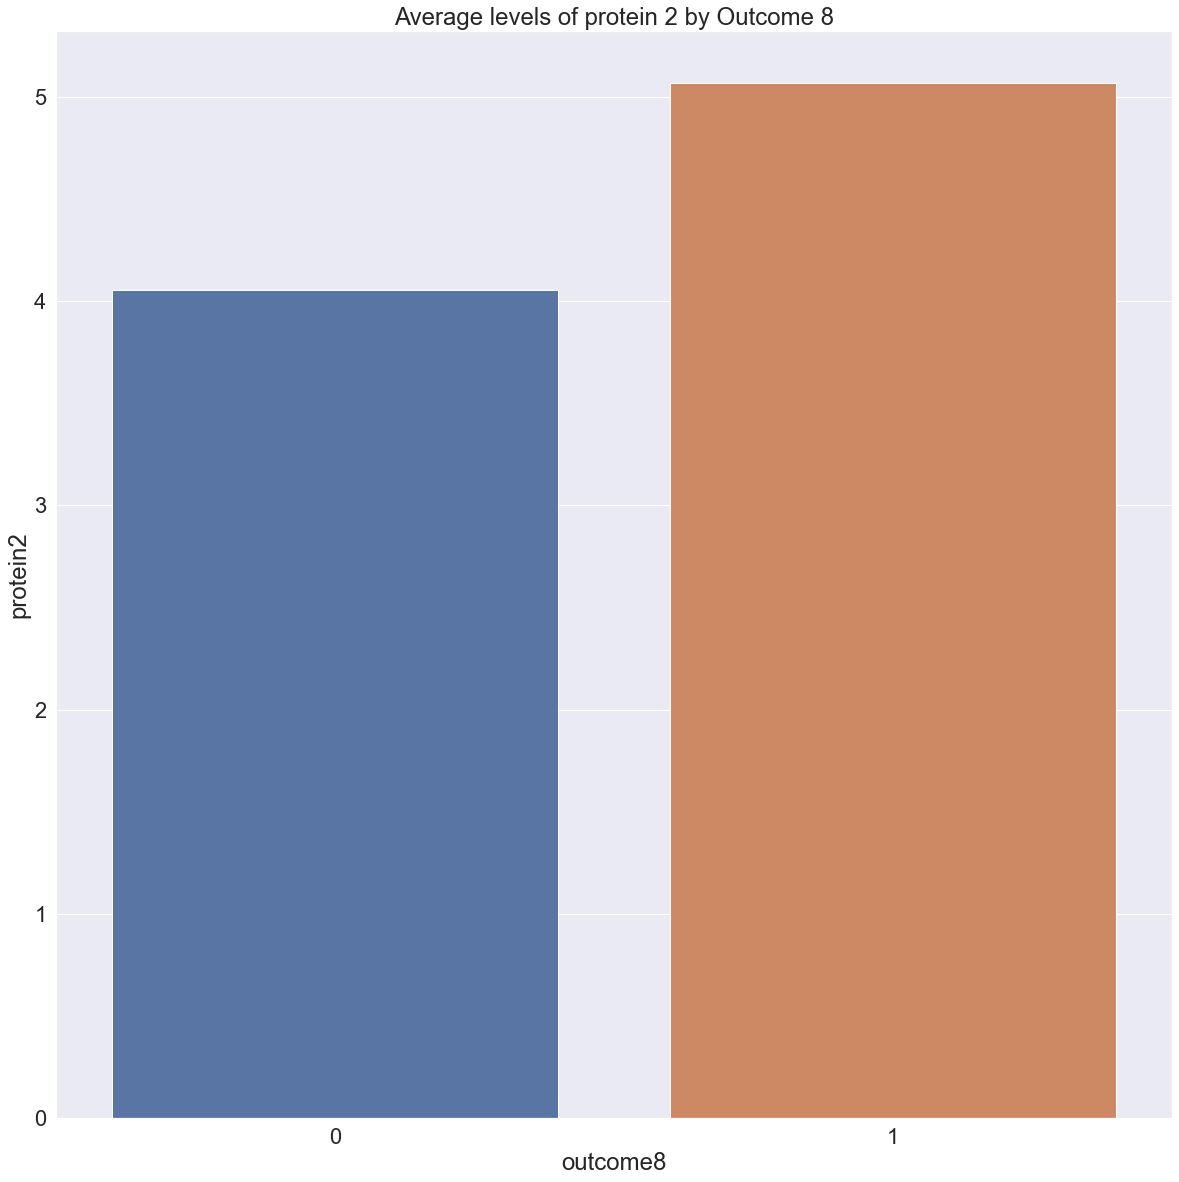

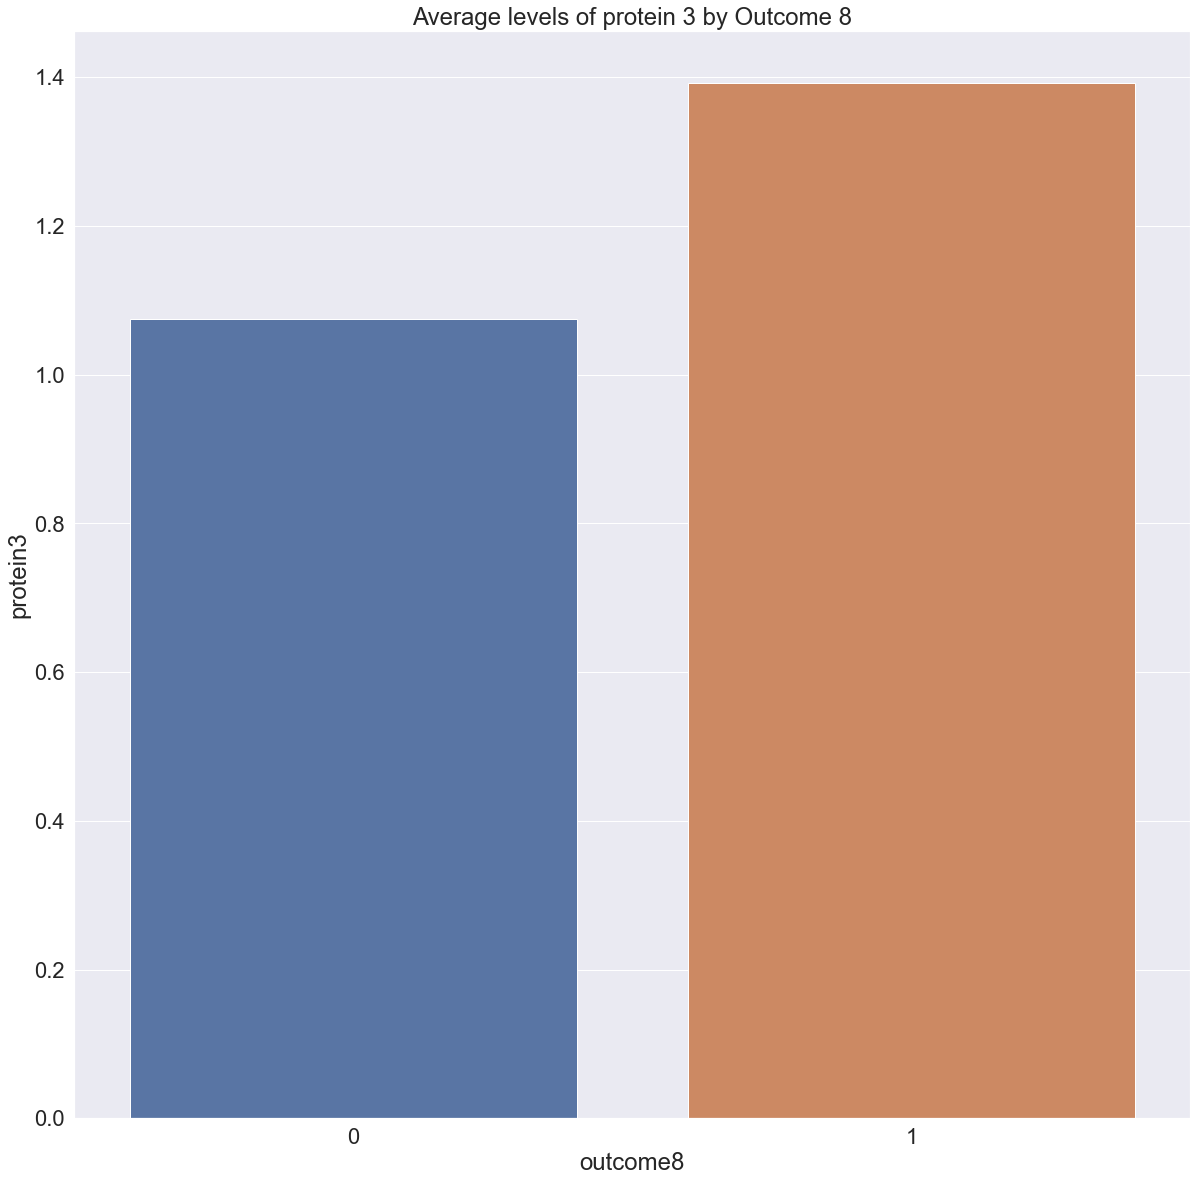

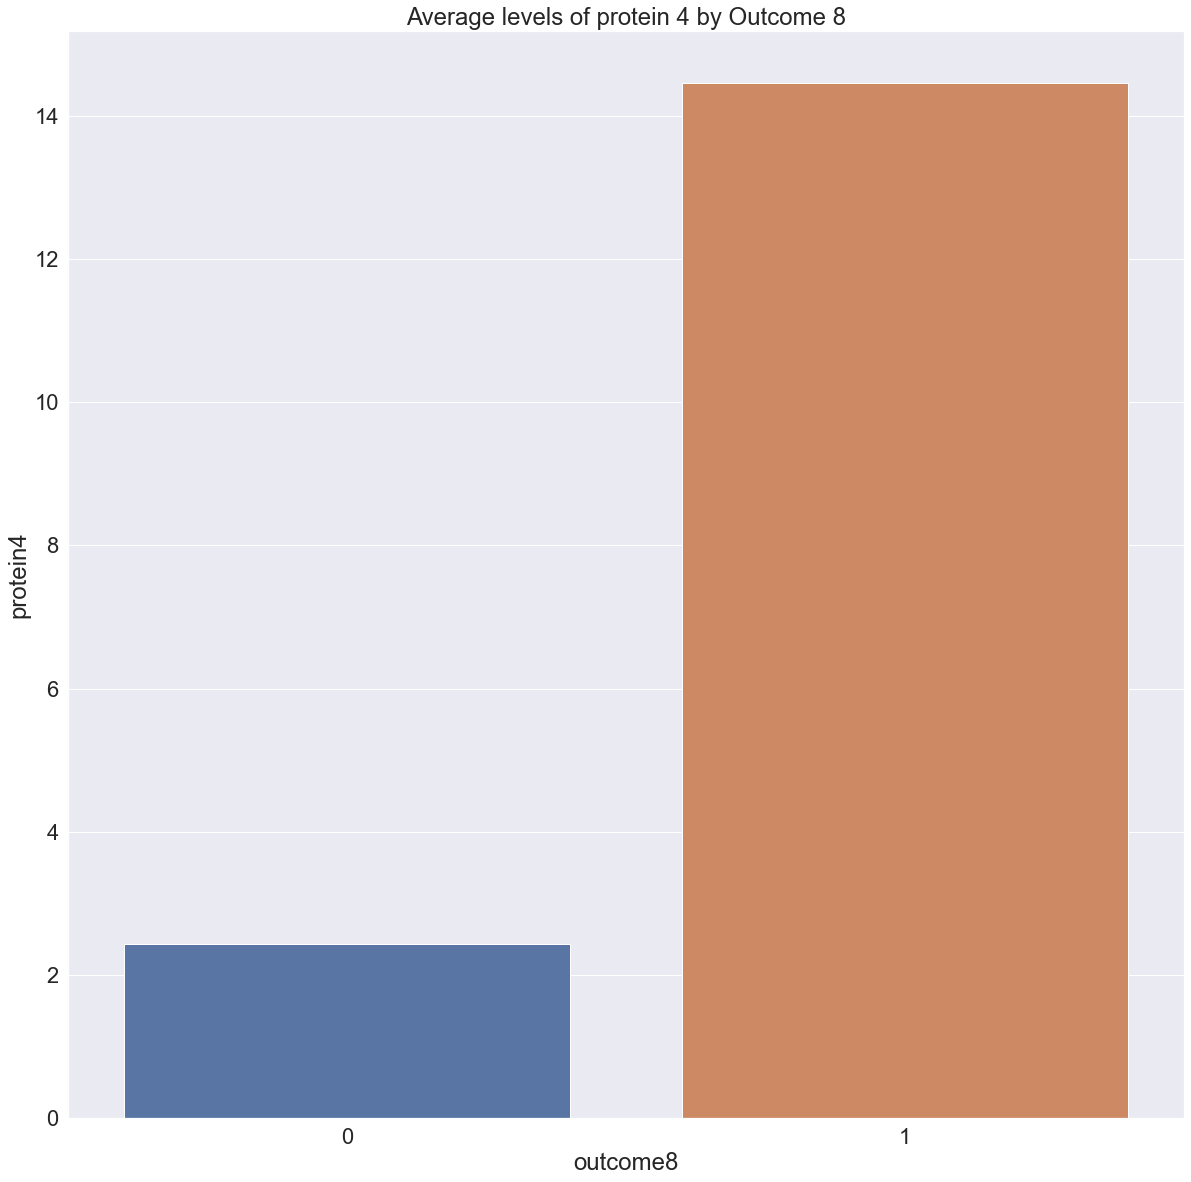

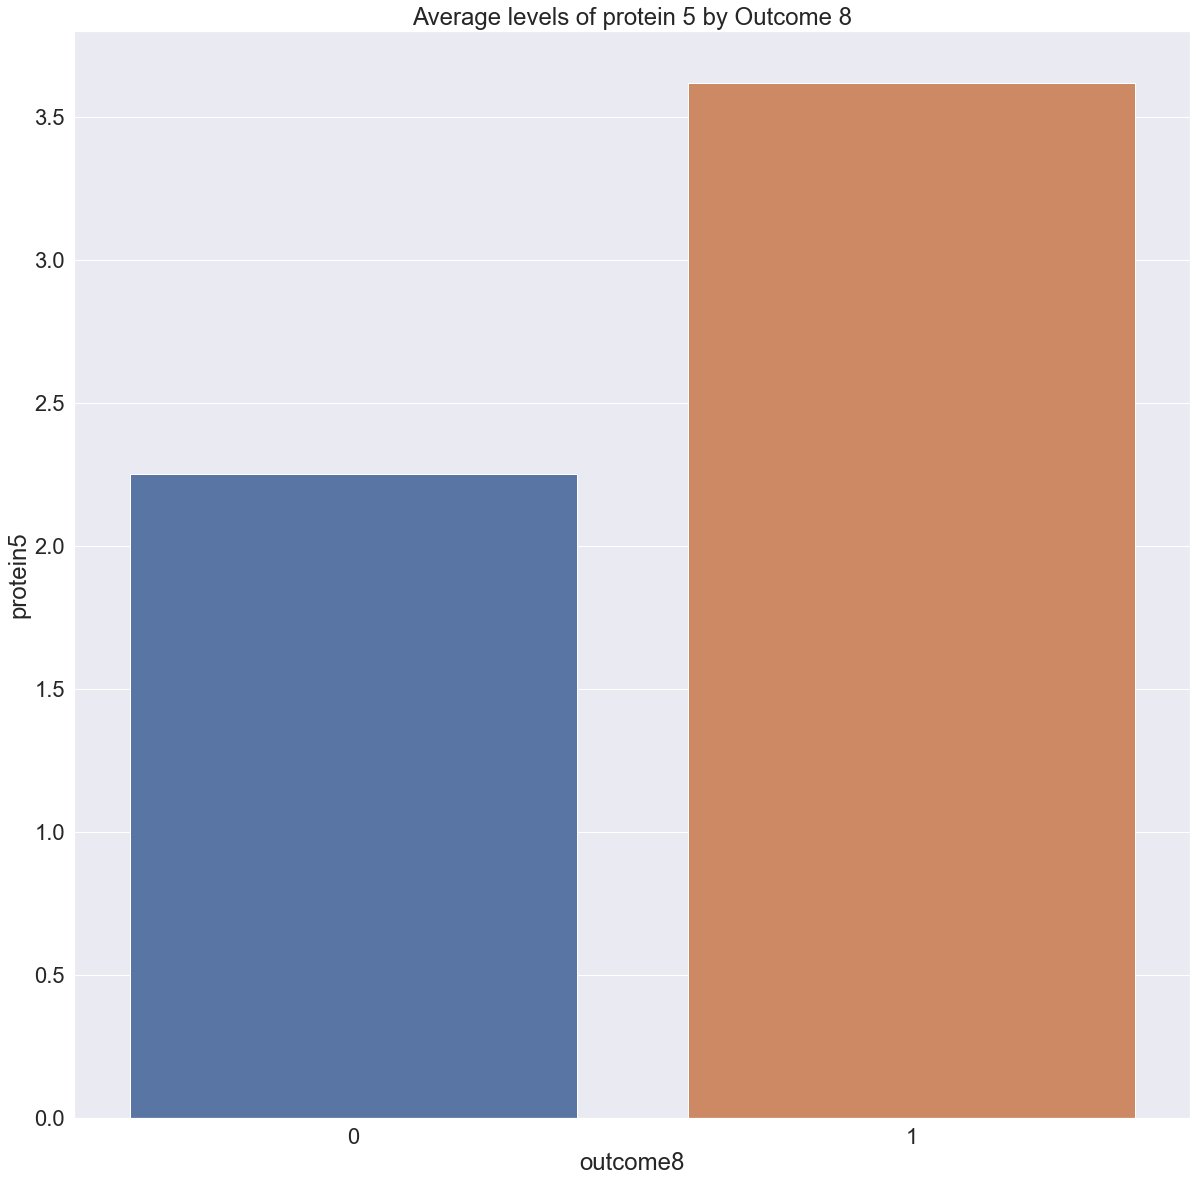

In [13]:
# Visualizing average proteins levels for patients with and without outcome 8. 
sns.set(font_scale = 2)
Pro1 = data.groupby('outcome8', as_index=False)['protein1'].mean()
Pro1 = Pro1.sort_values(by="protein1",ascending=False)

plt.figure(figsize=(20,20))
plt.title("Average levels of protein 1 by Outcome 8")
p = sns.barplot(x= 'outcome8', y='protein1', data=Pro1, ci=False)

sns.set(font_scale = 2)
Pro2 = data.groupby('outcome8', as_index=False)['protein2'].mean()
Pro2 = Pro2.sort_values(by="protein2",ascending=False)

plt.figure(figsize=(20,20))
plt.title("Average levels of protein 2 by Outcome 8")
p = sns.barplot(x= 'outcome8', y='protein2', data=Pro2, ci=False)

sns.set(font_scale = 2)
Pro3 = data.groupby('outcome8', as_index=False)['protein3'].mean()
Pro3 = Pro3.sort_values(by="protein3",ascending=False)

plt.figure(figsize=(20,20))
plt.title("Average levels of protein 3 by Outcome 8")
p = sns.barplot(x= 'outcome8', y='protein3', data=Pro3, ci=False)

sns.set(font_scale = 2)
Pro4 = data.groupby('outcome8', as_index=False)['protein4'].mean()
Pro4 = Pro4.sort_values(by="protein4",ascending=False)

plt.figure(figsize=(20,20))
plt.title("Average levels of protein 4 by Outcome 8")
p = sns.barplot(x= 'outcome8', y='protein4', data=Pro4, ci=False)

sns.set(font_scale = 2)
Pro5 = data.groupby('outcome8', as_index=False)['protein5'].mean()
Pro5 = Pro5.sort_values(by="protein5",ascending=False)

plt.figure(figsize=(20,20))
plt.title("Average levels of protein 5 by Outcome 8")
p = sns.barplot(x= 'outcome8', y='protein5', data=Pro5, ci=False)

#### Comments: Patients with outcome 8 have elevated plasma protein levels compared to patients without outcome 8. The largest different between the two groups was for protein 4.

Text(0.5, 1.0, 'Percentage of patients who have outcome 8')

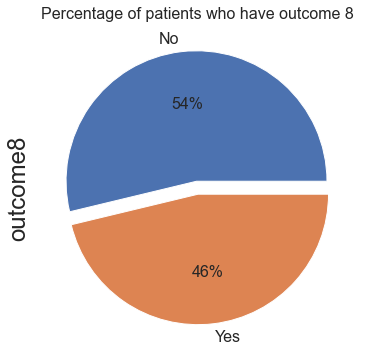

In [14]:
# Pie chart

labels = ['No','Yes']
data['outcome8'].value_counts().plot(kind='pie',autopct='%.0f%%',labels = labels, figsize = (6,6), fontsize=16, 
                                     explode = [0.05,0.05])
plt.title("Percentage of patients who have outcome 8", {"size" : 16})

#### Comments: The pie chart above shows a nearly balanced outcome 8.

<AxesSubplot:title={'center':'Heatmap'}>

<Figure size 576x432 with 0 Axes>

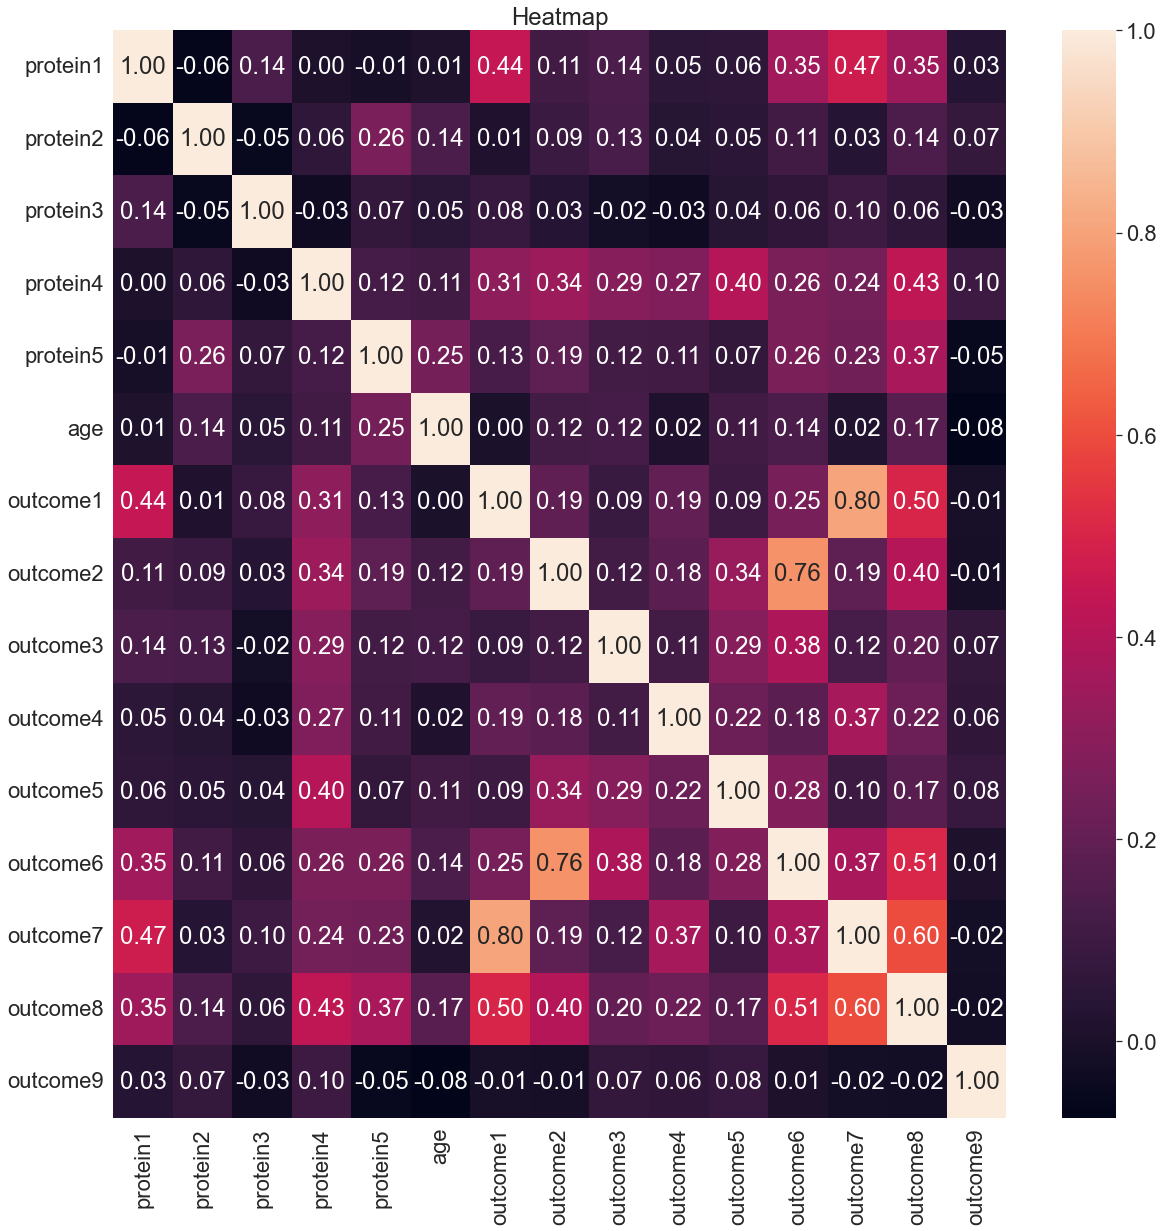

In [15]:
# Correlation heatmap for the study features
plt.tight_layout()
plt.figure(figsize=(20,20))
plt.title("Heatmap")
sns.heatmap(data.corr(), annot=True, fmt='.2f')

#### Comments: From the above heatmap, there are weak correlations  between the study proteins which will not cause collinearity issues in the model. As expected, there are high correlation between certain outcomes. This is because these outcomes are diagnostically related. But this should not be an issue as these outcomes will not be used together in the same model.

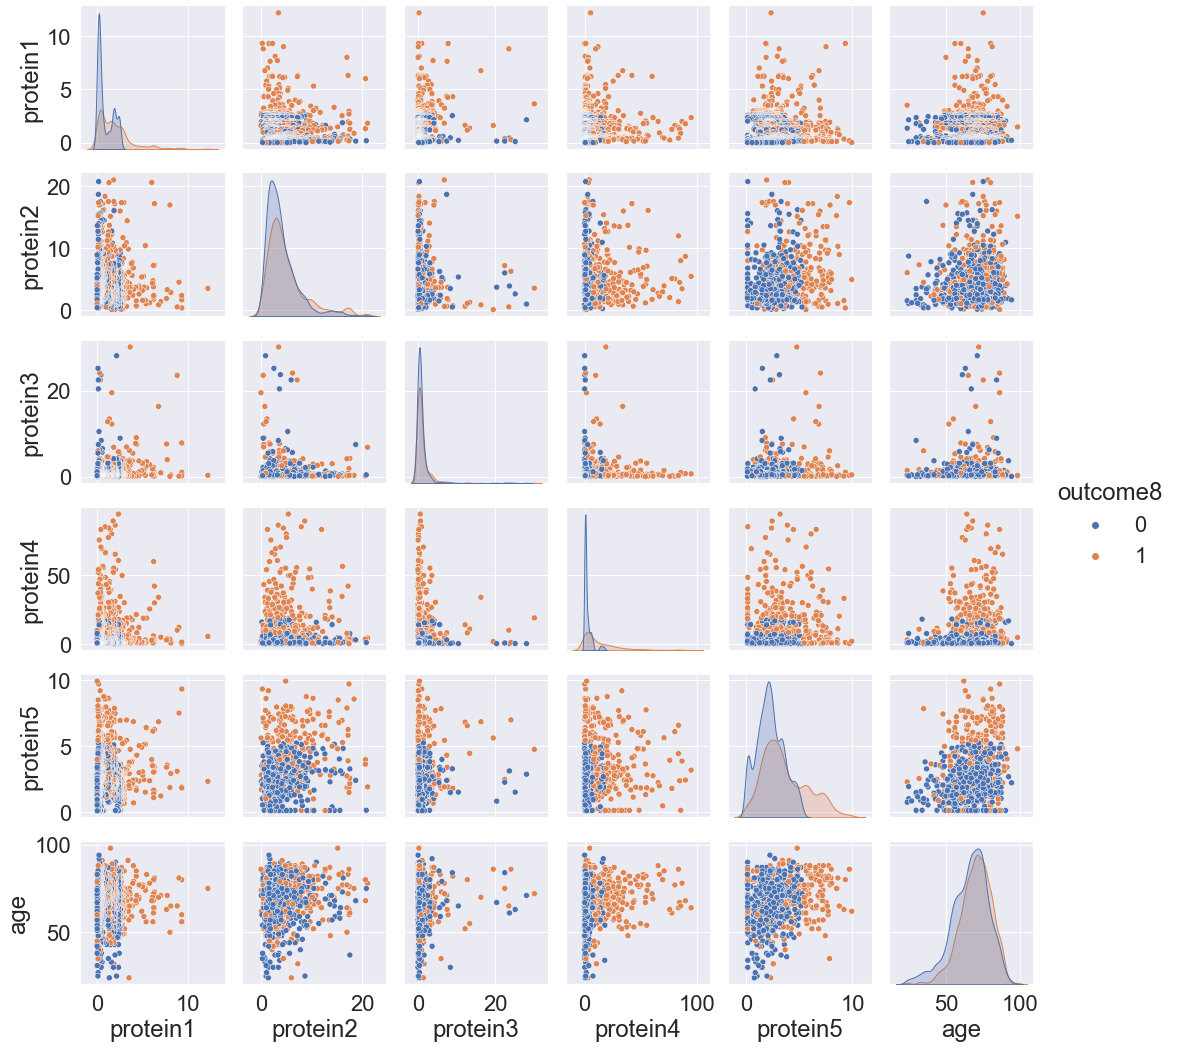

In [16]:
# Visualize data using seaborn Pairplots

# preparing the data with only one outcome 
data2 = data[['protein1', 'protein2', 'protein3', 'protein4', 'protein5',
       'age', 'sex', 'hypertension', 'hypercholesterolemia', 'diabetes',
       'smoking', 'congestive heart failure', 'coronary artery disease',
       'stroke', 'statin', 'aspirin', 'outcome8']]

g = sns.pairplot(data2, hue = 'outcome8', diag_kws={'bw': 0.2})

#### Comments: From the pariplot above, a notable relation between protien 4 and outcome 8 is noticed. As the higher protien 4 value the more likely the patient will have outcome 8. The same applys for protien 1 and protien 5.

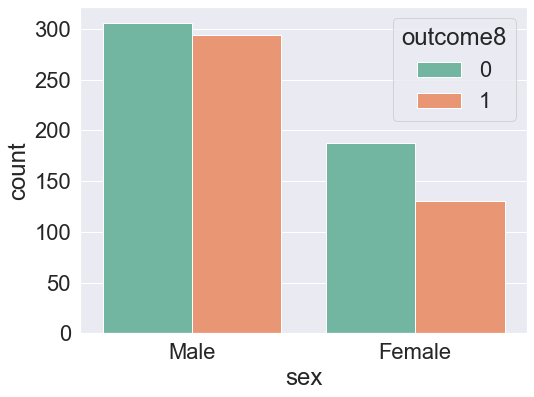

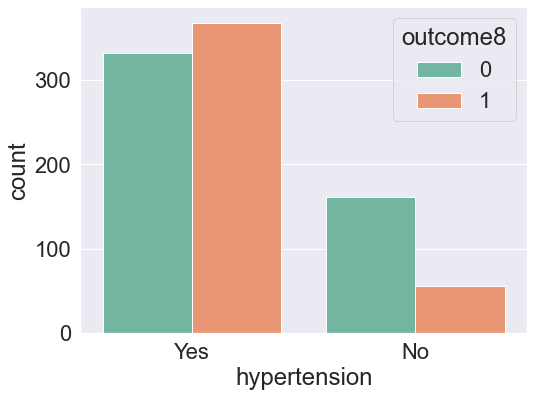

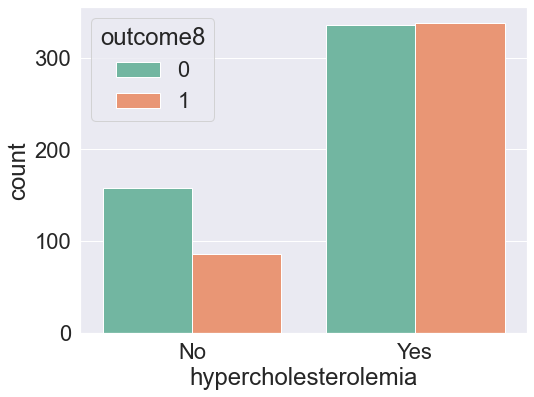

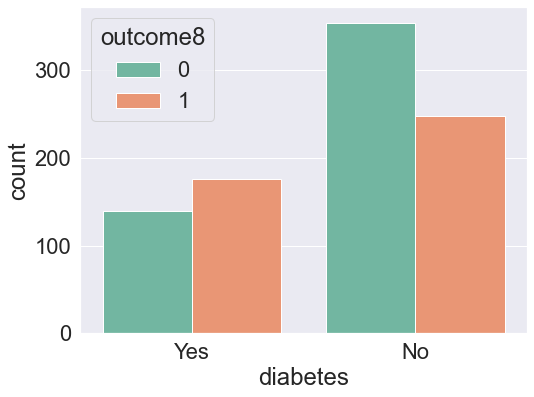

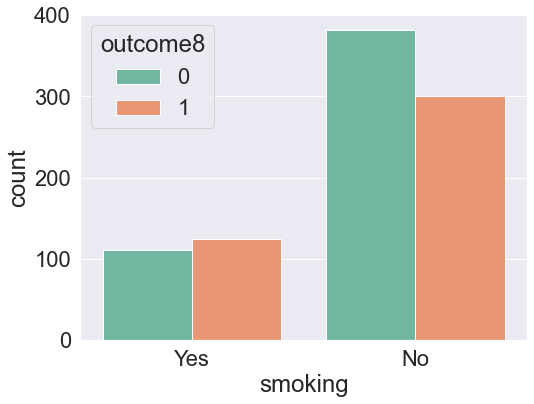

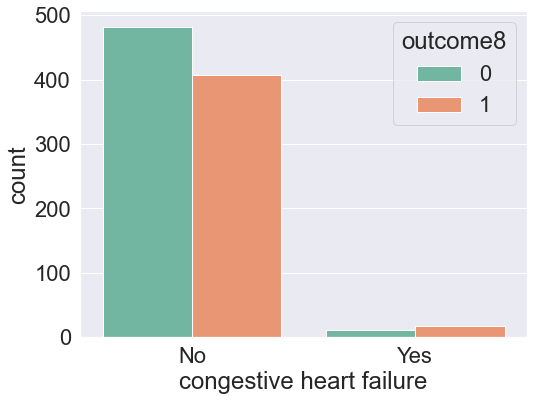

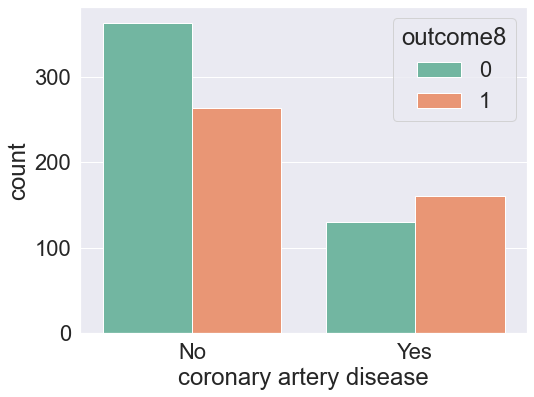

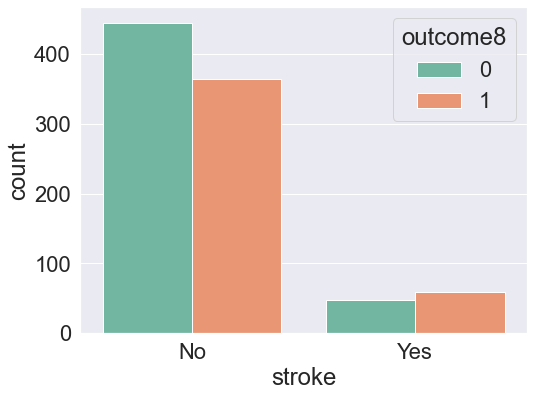

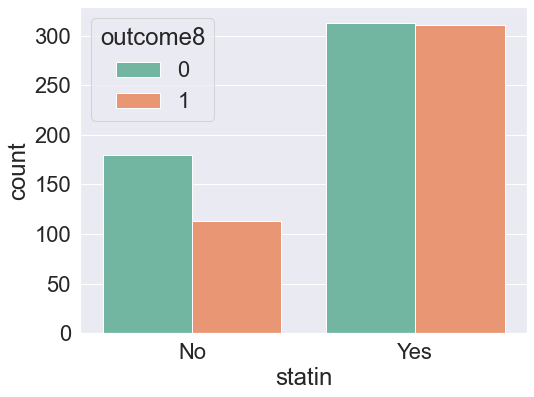

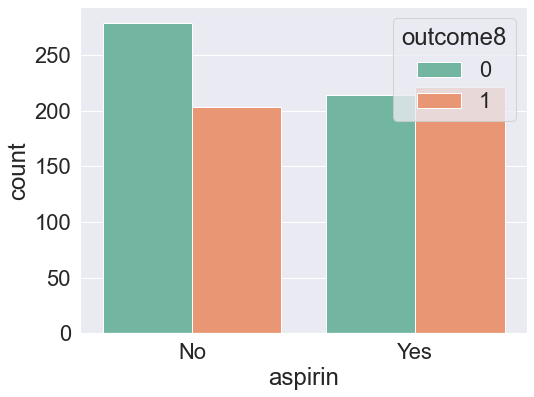

In [17]:
# Investigate all features by outcome 8

features = ['sex','hypertension', 'hypercholesterolemia', 'diabetes',
       'smoking', 'congestive heart failure', 'coronary artery disease',
       'stroke', 'statin', 'aspirin']


for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data=data2, hue = 'outcome8', palette="Set2")

#### Comments: From the above barchart a noticeable increase in patients with no outcome 8 who satisfy one of the following conditions(non-smoker, no hypertension, no hypercholesterolemia, no diabetes, no congestive heart failure, or coronary artery disease). Also patients who are not taking aspirin or stain are less likely to have a outcome 8 than those who do. Female patients are less likely to have outcome 8 compared to male patients.

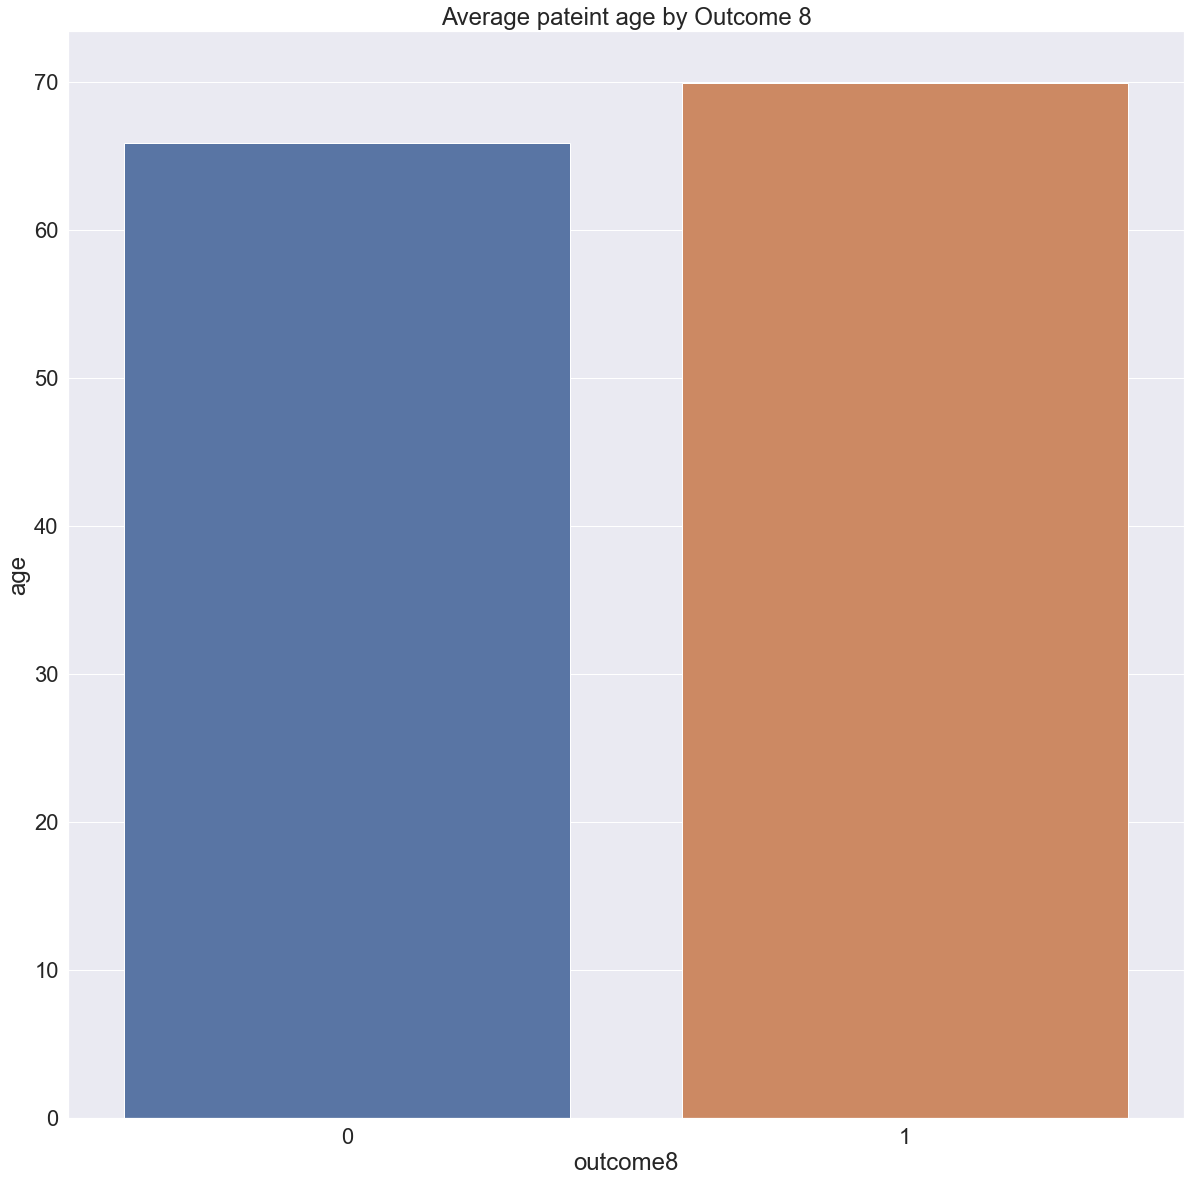

In [18]:
# Investigate age by outcome 8
sns.set(font_scale = 2)
age = data.groupby('outcome8', as_index=False)['age'].mean()
age = age.sort_values(by="age",ascending=False)

plt.figure(figsize=(20,20))
plt.title("Average pateint age by Outcome 8")
p = sns.barplot(x= 'outcome8', y='age', data=age, ci=False)

#### Comments: There is no noticeable difference between parents with or without outcome 8 based on their age.

---------

----------

## 3. Data preparation – How do we organize the data for modeling?

### 3.1 Preparing the data for analysis

In [19]:
#setting the X dataset
X = data.drop(['outcome1','outcome2','outcome3','outcome4','outcome5','outcome6','outcome7','outcome8','outcome9'], axis = 1)

#setting different datasets for each outcome
y1 = data['outcome1']
y2 = data['outcome2']
y3 = data['outcome3']
y4 = data['outcome4']
y5 = data['outcome5']
y6 = data['outcome6']
y7 = data['outcome7']
y8 = data['outcome8']
y9 = data['outcome9']


In [20]:
#getting dummy variables for categorical data in X
X = pd.get_dummies(X)

In [21]:
#using standardscaler for continuous variables 
scaled_features = X.copy()
col_names = ['protein1', 'protein2','protein3','protein4','protein5','age']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features

In [22]:
#setting training and testing sets for each study outcome
X1_train, X1_test, y1_train, y1_test = train_test_split(scaled_features,y1, test_size = 0.3, random_state = 42)
X2_train, X2_test, y2_train, y2_test = train_test_split(scaled_features,y2, test_size = 0.3, random_state = 42)
X3_train, X3_test, y3_train, y3_test = train_test_split(scaled_features,y3, test_size = 0.3, random_state = 42)
X4_train, X4_test, y4_train, y4_test = train_test_split(scaled_features,y4, test_size = 0.3, random_state = 42)
X5_train, X5_test, y5_train, y5_test = train_test_split(scaled_features,y5, test_size = 0.3, random_state = 42)
X6_train, X6_test, y6_train, y6_test = train_test_split(scaled_features,y6, test_size = 0.3, random_state = 42)
X7_train, X7_test, y7_train, y7_test = train_test_split(scaled_features,y7, test_size = 0.3, random_state = 42)
X8_train, X8_test, y8_train, y8_test = train_test_split(scaled_features,y8, test_size = 0.3, random_state = 42)
X9_train, X9_test, y9_train, y9_test = train_test_split(scaled_features,y9, test_size = 0.3, random_state = 42)

--------

-------

## 4. Modeling – What modeling techniques should we apply?

Modeling plan:

Decision trees as a supervised learning method will be used used for classification. Depending on the results from the model, random forest as an ensemble technique that include multiple decision trees will be used. As this method combines multiple decision trees into one final output rather than relying on individual decision trees. 

### 4.1 Decision Tree

In [23]:
# Building a decision tree model with the best parameters. 
params = {'max_depth': [2, 4, 5, 8,10,30,40],
         'min_samples_split': [0.1, 0.2,0.05,0.01],
          'criterion': ['gini', 'entropy', 'log_loss'],
          'min_samples_leaf': [2,5,10]
         }
grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params).fit(X8_train, y8_train)
grid_train_acc = grid.score(X8_train, y8_train)
tree_grid_test_acc = grid.score(X8_test, y8_test)
best_params = grid.best_params_
print(f'Best parameters of tree: {best_params}')

Best parameters of tree: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 0.05}


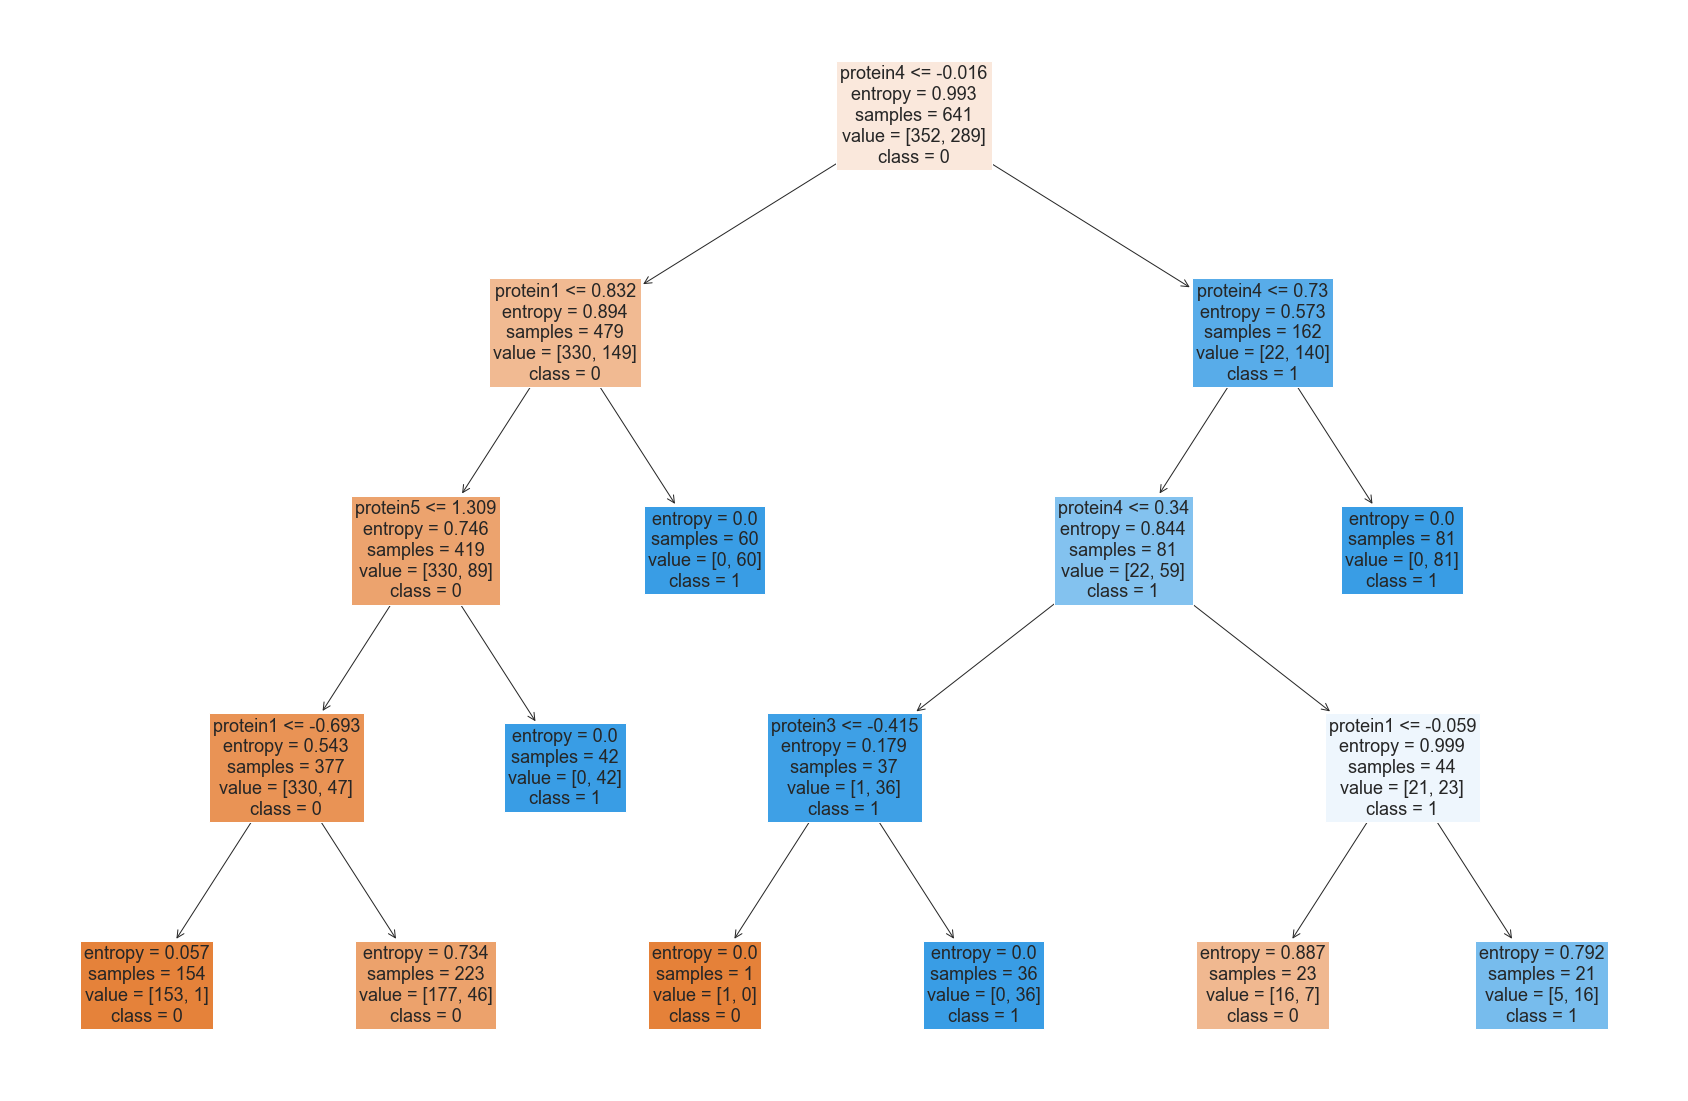

In [24]:
# An example for the decision tree model with a max_depth set to four.
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42).fit(X8_train, y8_train)
fig, ax = plt.subplots(figsize = (30, 20))
plot_tree(dt, feature_names=list(X8_train.columns), filled=True, ax = ax, fontsize=18,class_names=['0','1']);

In [25]:
# Building a function for the confusion matrix

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Training Accuracy is:  0.9313572542901716
Testing Accuracy is:  0.8768115942028986


array([[127,  14],
       [ 20, 115]])

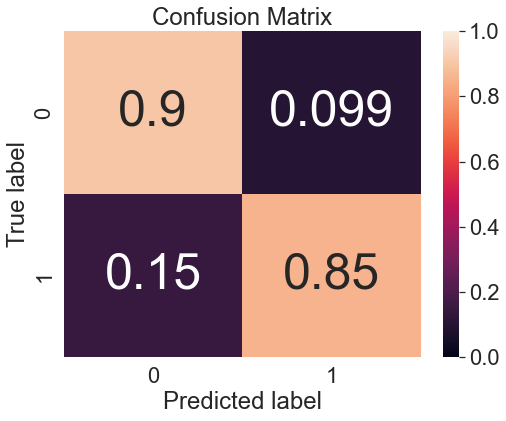

In [26]:
# building the best decision tree model

dt = DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf = 2, 
                            min_samples_split = 0.05, random_state=42).fit(X8_train, y8_train)


y_pred = dt.predict(X8_test)

# Accuracy on Test
print("Training Accuracy is: ", dt.score(X8_train, y8_train))
# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X8_test, y8_test))

# Plotting the confusion matrix for the best model
cm = confusion_matrix(y8_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Confusion Matrix')

y_pred = dt.predict(X8_test)
y_pred
confusion_matrix(y8_test, y_pred)

In [27]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) and True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Recall: What proportion of actual positives was identified correctly? (also known as sensitivity).
TPR = TP/(TP+FN)

# Precision: What proportion of positive identifications was actually correct?
PPV = TP/(TP+FP)

# False positive rate: ratio between number of negative events wrongly categorized as positive 
# and total number of actual negative events
FPR = FP/(FP+TN)

# False negative rate: incorrectly indicates the absence of a condition when it is actually present.
FNR = FN/(TP+FN)

# Overall accuracy: measures ability to detect a condition when it is present 
# and detect the absence of a condition when it is absent.
ACC = (TP+TN)/(TP+FP+FN+TN)

##Total averages :
print ("The Recall is: ",TPR.sum()/2)
print ("The Precision is: ",PPV.sum()/2)
print ("The False positive rate is: ",FPR.sum()/2)
print ("The False negative rate is: ",FNR.sum()/2)
print ("The Accuracy is", ACC.sum()/2)

The Recall is:  0.8762805358550039
The Precision is:  0.8777092232241734
The False positive rate is:  0.12371946414499606
The False negative rate is:  0.12371946414499606
The Accuracy is 0.8768115942028986


<AxesSubplot:>

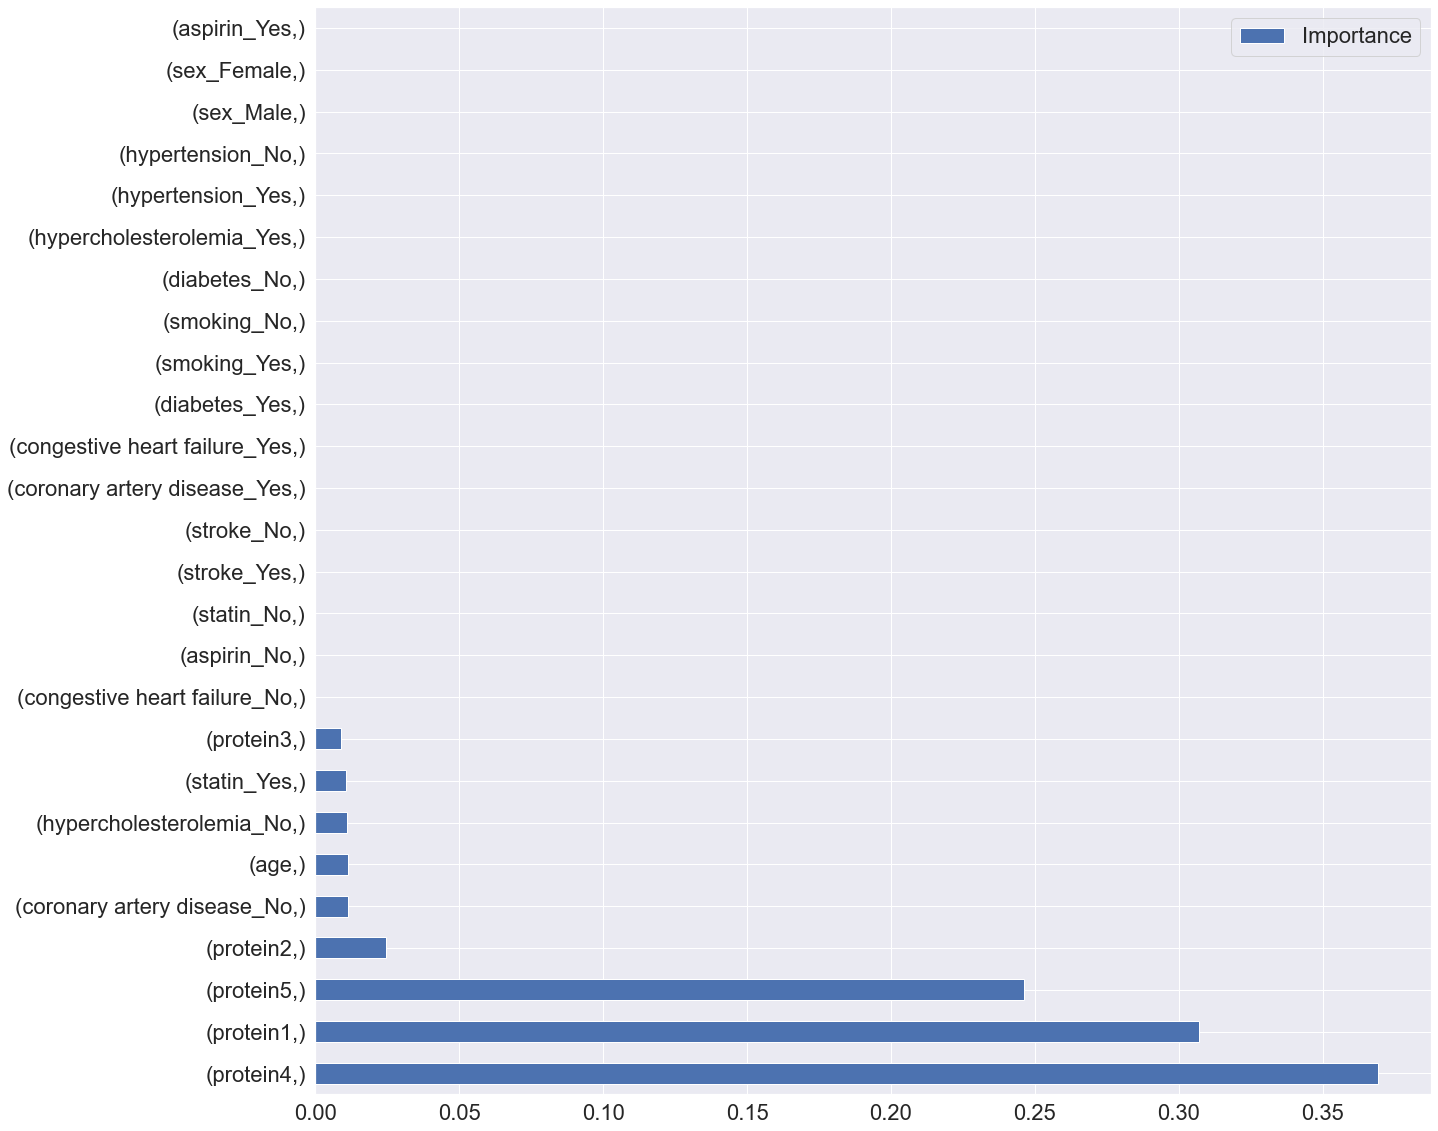

In [28]:
sns.set(font_scale = 2)

# Getting the coefficients of the best model into a data frame
dt8 = pd.DataFrame(dt.feature_importances_)
dt8 = dt8.T
dt8.columns = [X8_train.columns]

# Transposing the data frame to build a bar chart
dt8 = dt8.T
dt8.rename(columns = {0:'Importance'}, inplace = True)

# Plotting the coefficients of the decision tree best model
dt8 = dt8.sort_values(by="Importance",ascending=False)
dt8.plot.barh(figsize=(20,20))

#### Comments: Protein 4 had the highest importance in the model followed by protein 1.

---------

### 4.2 Random Forest Classifier

#### 4.2.1 Outcome 8

Classification accuracy on test set with max features = 1 and max_depth = None: 0.790
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.696
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.717
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.725
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.768
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.880
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.862
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.880
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.888
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.880
Classification accuracy on test set with max features = log2 and max_depth = None: 0.880
Classification accuracy on test set with max features = log2

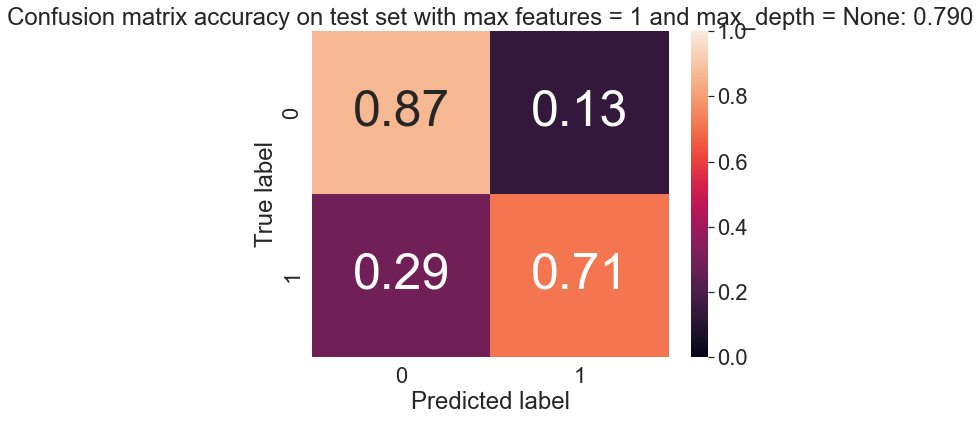

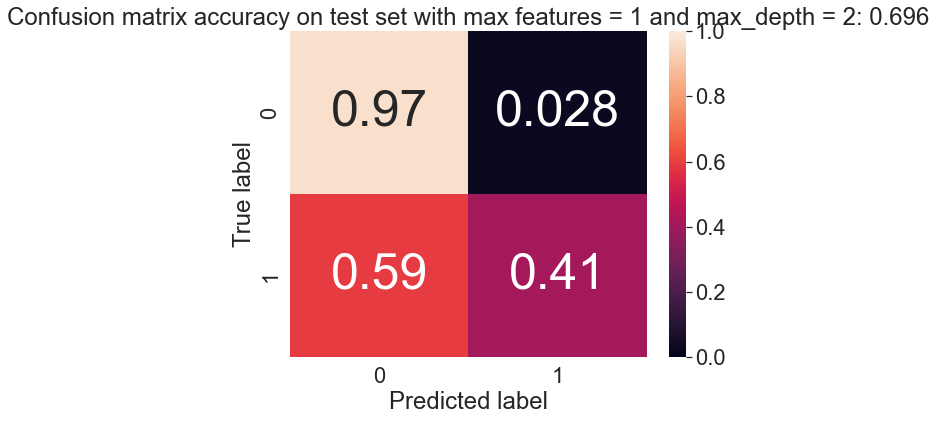

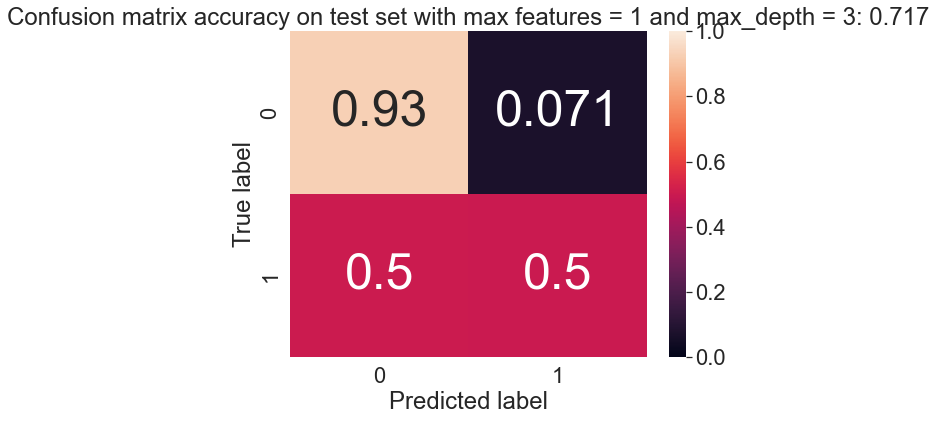

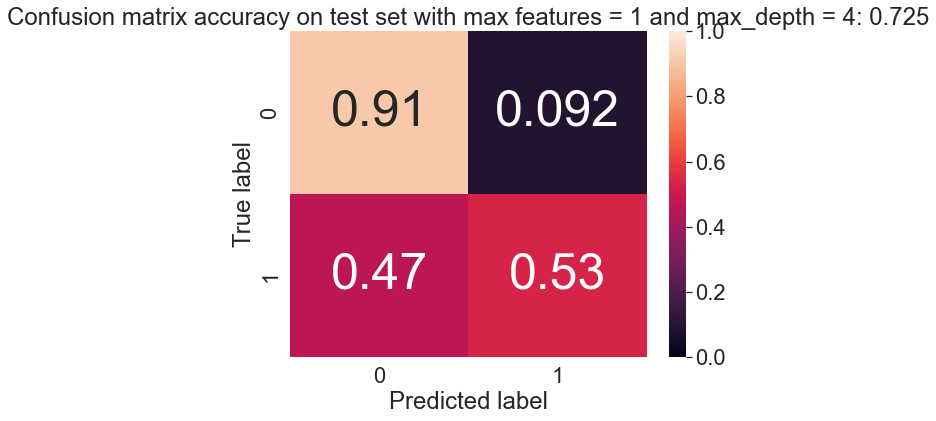

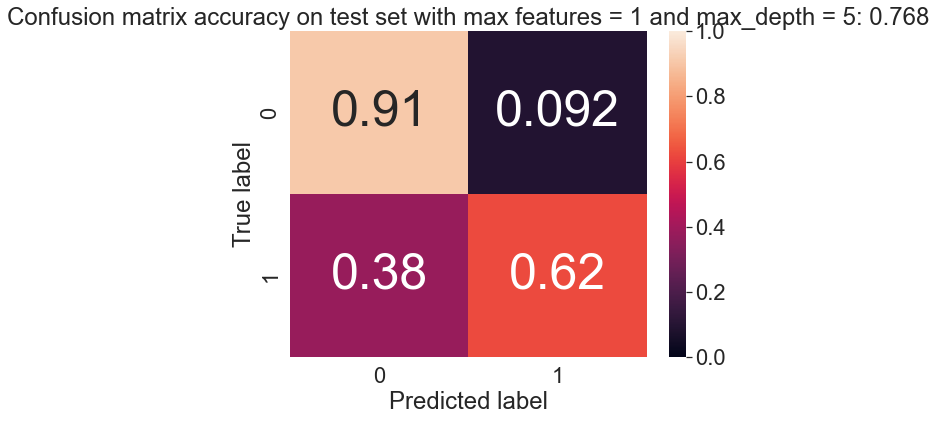

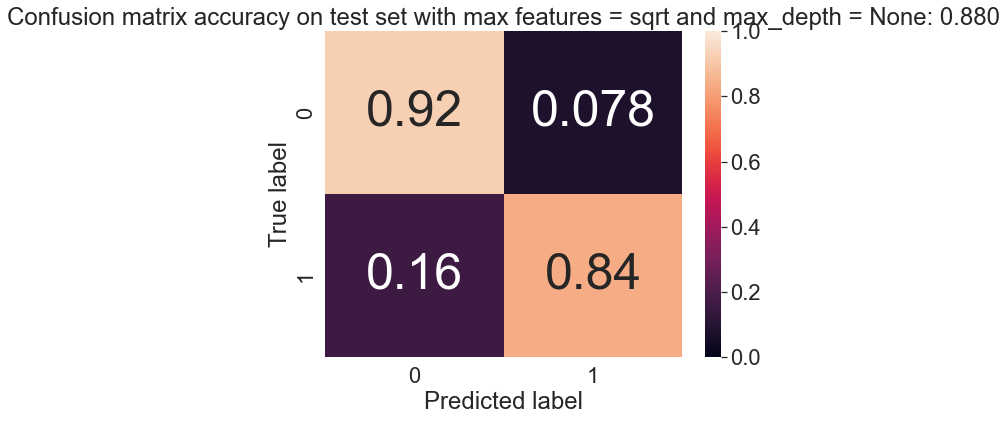

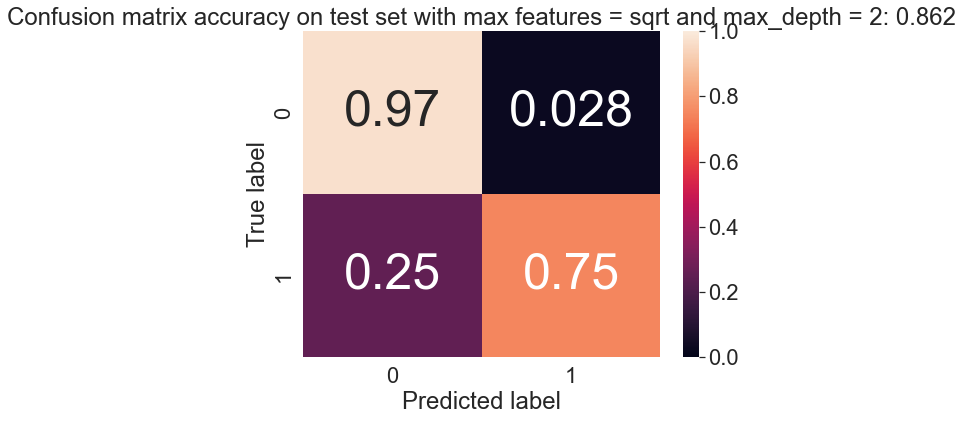

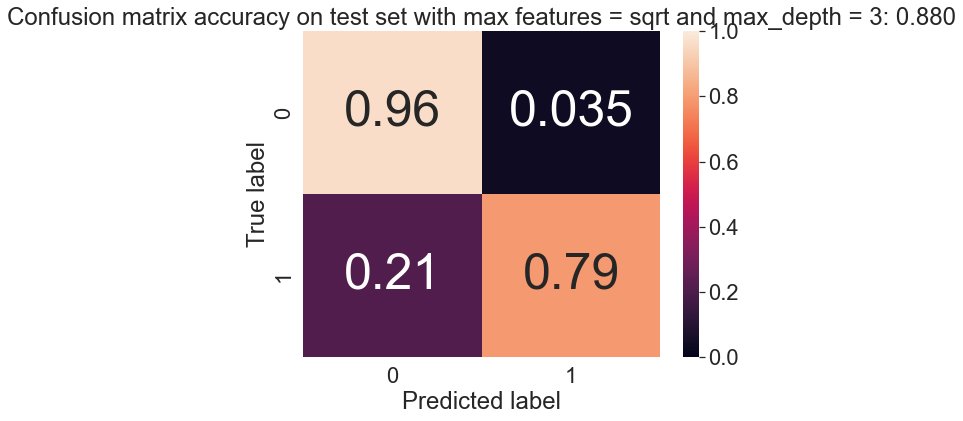

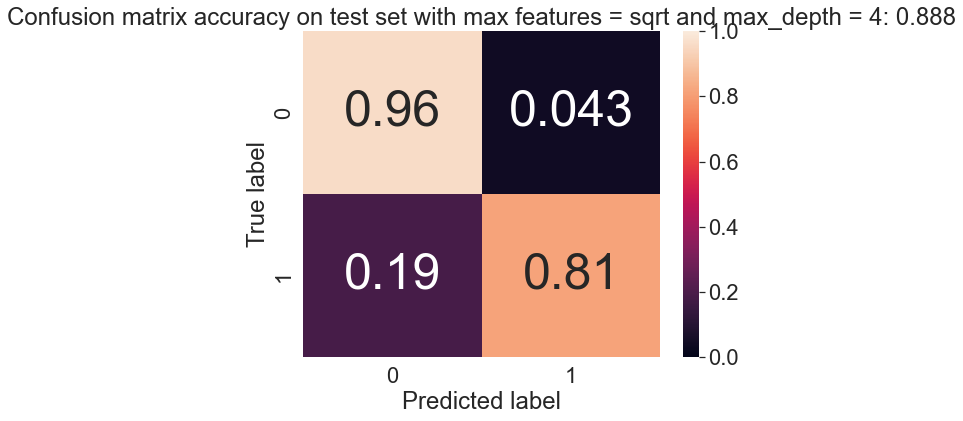

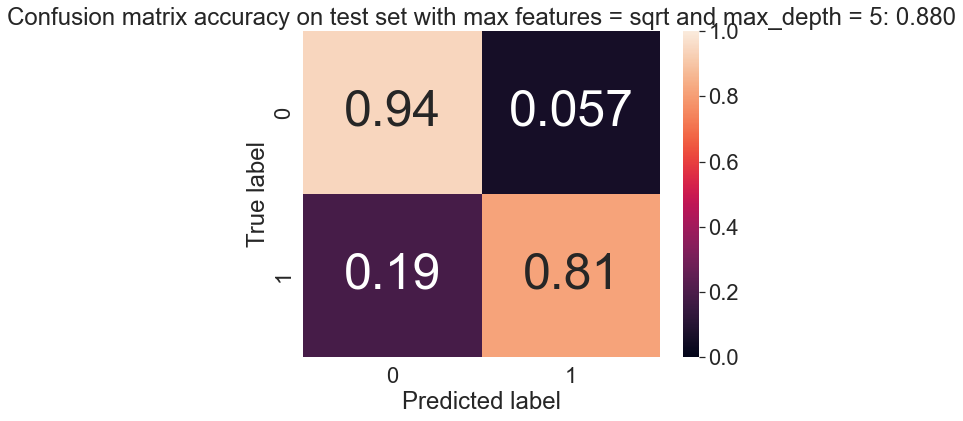

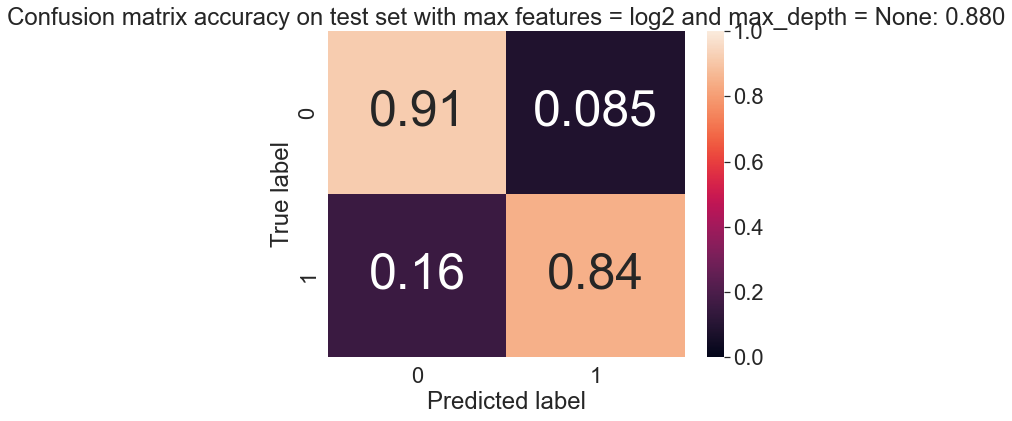

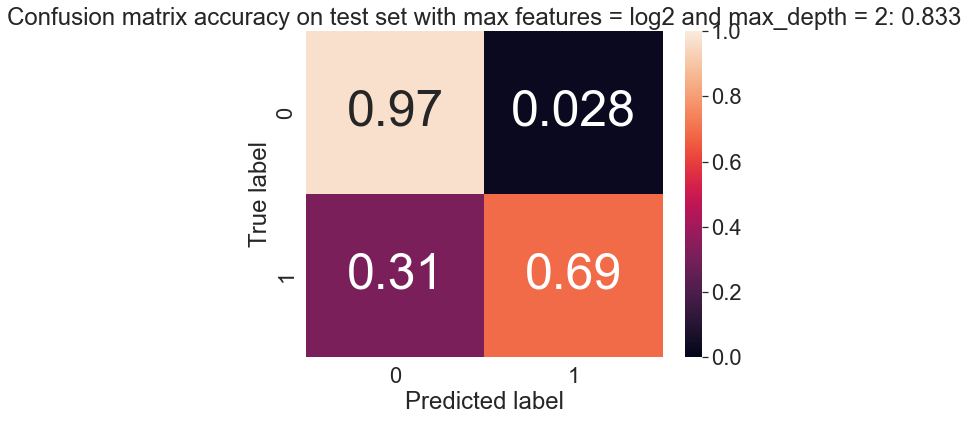

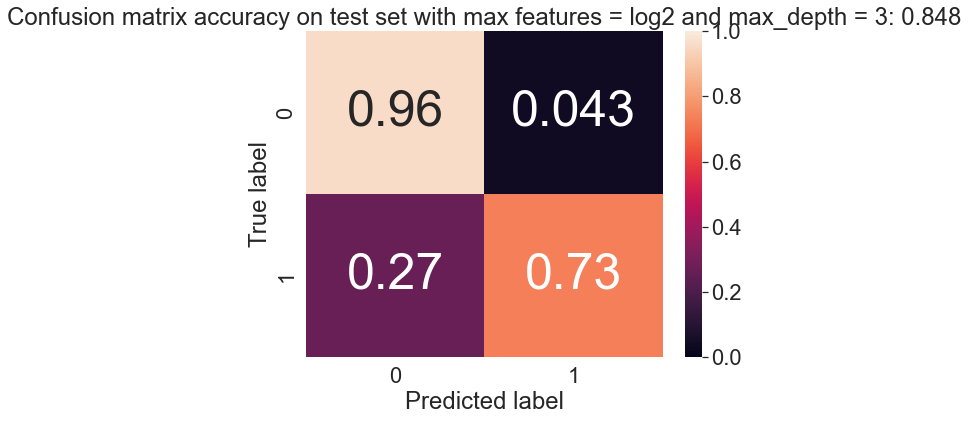

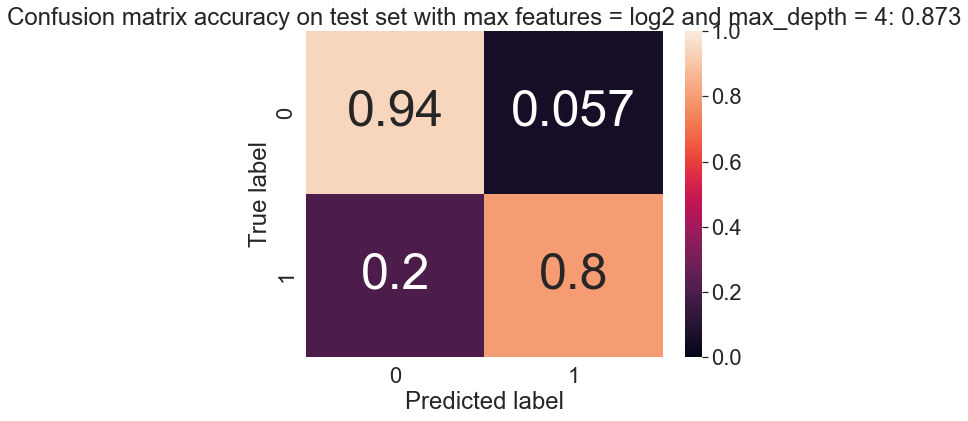

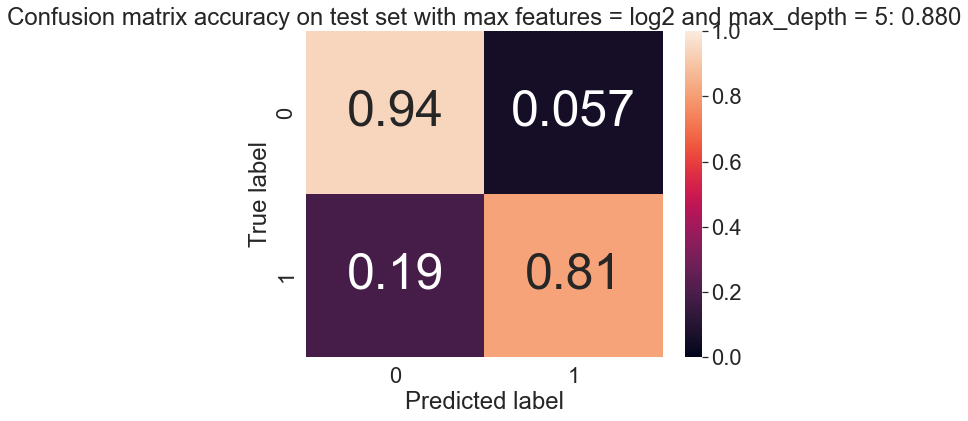

In [29]:
# Tunning random forest to get the best parameters

n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # using product to iterate through all possible combinations
    rf8_select = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=42)
    rf8_select.fit(X8_train, y8_train)
    prediction_test = rf8_select.predict(X=X8_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y8_test,prediction_test)))
    cm = confusion_matrix(y8_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf8_select.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y8_test,prediction_test)))


#### Comments: The best random forest  parameters are max features = sqrt and max_depth = 4. The test set classification accuracy is 0.888

Training Accuracy is:  0.9079563182527302
Testing Accuracy is:  0.8876811594202898


<AxesSubplot:>

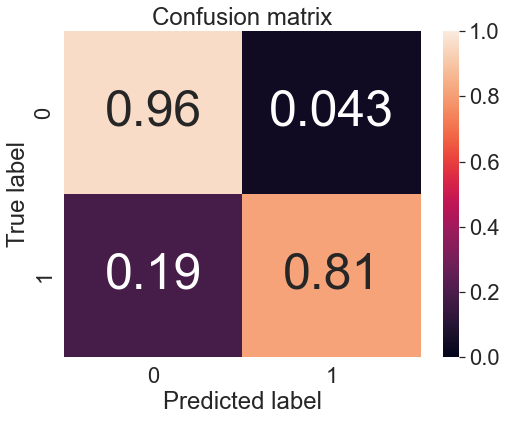

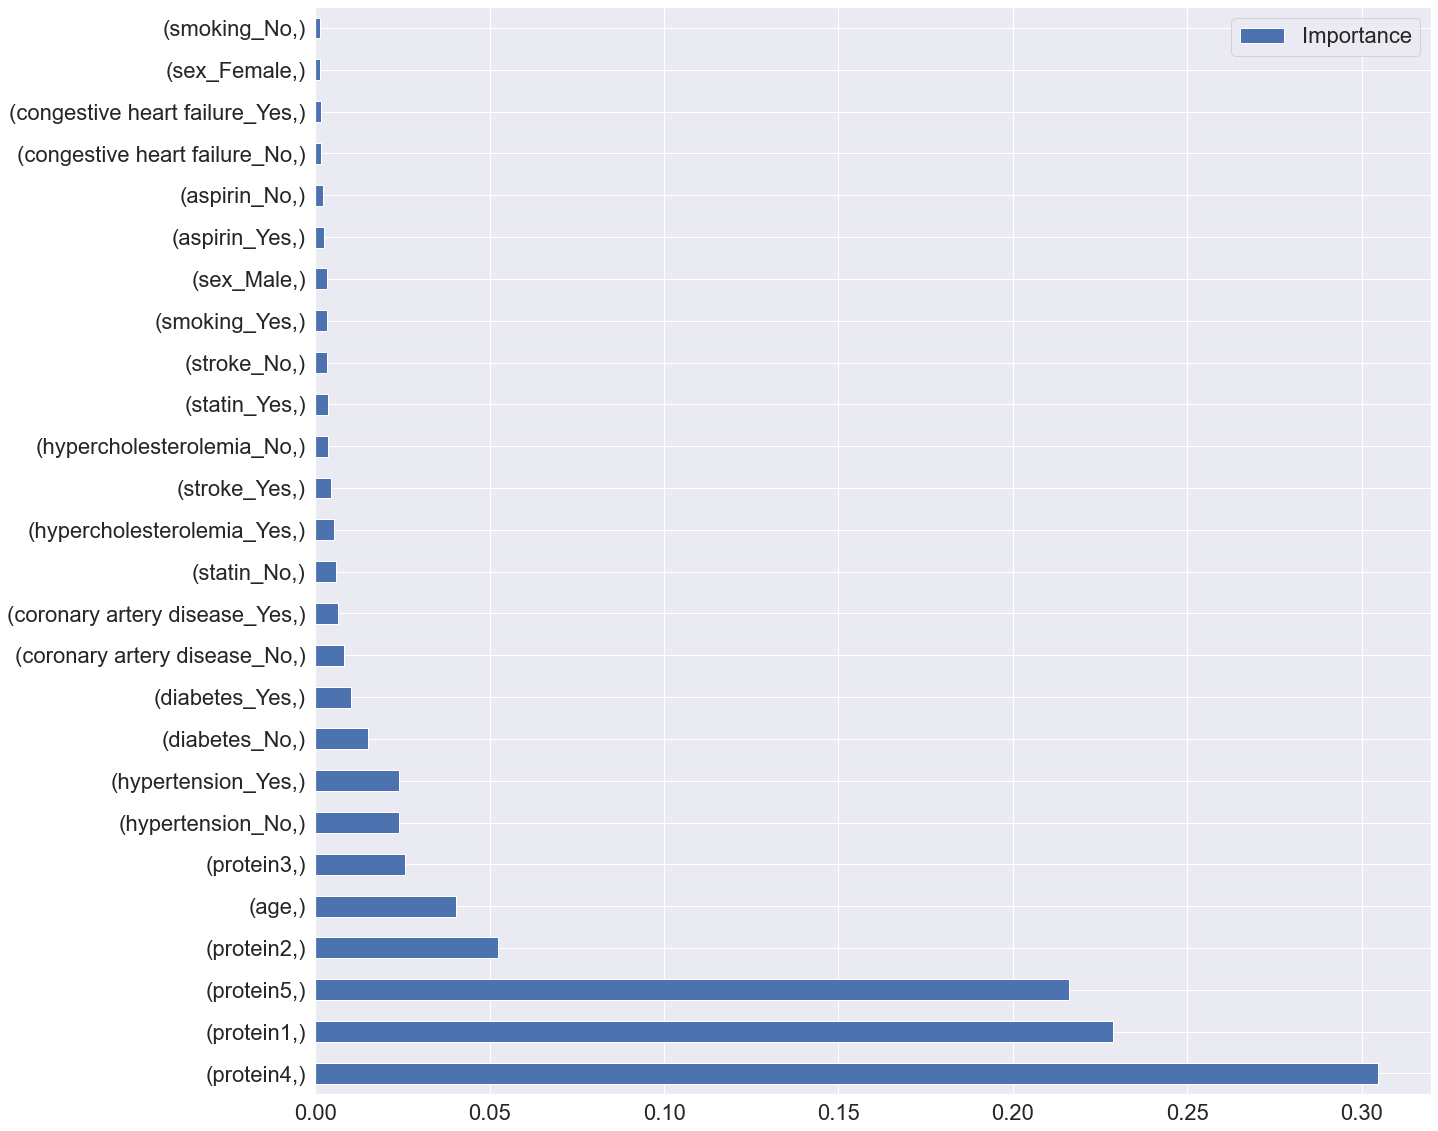

In [30]:
# using the parameters from previous step to calculate model performance.

rf8 = RandomForestClassifier(n_estimators=100, criterion='entropy', 
                                max_features='sqrt', 
                                max_depth= 4, 
                                n_jobs=2,
                                random_state=42)
rf8.fit(X8_train, y8_train)
prediction_test = rf8.predict(X=X8_test)



# Accuracy on Test
print("Training Accuracy is: ", rf8.score(X8_train, y8_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf8.score(X8_test, y8_test))

# Confusion Matrix
cm = confusion_matrix(y8_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf8.classes_)

sns.set(font_scale = 2)

# Getting the coefficients of the best model into a data frame
coef_rf8 = pd.DataFrame(rf8.feature_importances_)
coef_rf8 = coef_rf8.T
coef_rf8.columns = [X8_train.columns]

# Transposing the data frame to build a bar chart
coef_rf8 = coef_rf8.T

coef_rf8.rename(columns = {0:'Importance'}, inplace = True)

# Plotting the coefficients of the random forest best model
coef_rf8 = coef_rf8.sort_values(by="Importance",ascending=False)
coef_rf8.plot.barh(figsize=(20,20))

#### Comments: Protein 4 had the highest importance in the model followed by proteins 1 and 5.

In [31]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) and True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Recall
TPR = TP/(TP+FN)

# Precision
PPV = TP/(TP+FP)

# False positive rate
FPR = FP/(FP+TN)

# False negative rate
FNR = FN/(TP+FN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

##Total averages :
print ("The Recall is: ",TPR.sum()/2)
print ("The Precision is: ",PPV.sum()/2)
print ("The False positive rate is: ",FPR.sum()/2)
print ("The False negative rate is: ",FNR.sum()/2)
print ("The Accuracy is", ACC.sum()/2)

The Recall is:  0.8861308116627266
The Precision is:  0.8960129310344828
The False positive rate is:  0.11386918833727344
The False negative rate is:  0.11386918833727344
The Accuracy is 0.8876811594202898


In [32]:
# This function will create different precision and recall values for each threshold value

def precision_thresh(predict_probs, y_test, thresh):
    preds = np.where(predict_probs >= thresh, 1, 0)
    
    return precision_score(y_test, preds, pos_label=1)

test_predictions = rf8.predict_proba(X8_test)

thresholds = np.arange(0, 1, .1)
results_df = pd.DataFrame({'threshold': thresholds, 'precision': [precision_thresh(test_predictions[:, 1], y8_test, i) for i in thresholds]})

def recall_thresh(predict_probs, y_test, thresh):
    preds = np.where(predict_probs >= thresh, 1, 0)
    
    return recall_score(y8_test, preds, pos_label=1)
results_df['recall'] = [recall_thresh(test_predictions[:, 1], y8_test, i) for i in thresholds]
results_df

threshold  precision    recall
0        0.0   0.489130  1.000000
1        0.1   0.489130  1.000000
2        0.2   0.542169  1.000000
3        0.3   0.670051  0.977778
4        0.4   0.862319  0.881481
5        0.5   0.948276  0.814815
6        0.6   1.000000  0.674074
7        0.7   1.000000  0.266667
8        0.8   1.000000  0.118519
9        0.9   1.000000  0.014815

#### Comments: Given the nature of CVD, a sensitive test is requiered in order to avoid missing patients at risk. As a result, focusing on increaseing the recall is a must. Therfore, the threshold should be adjusted from 50% to 40% achiveing a recall of 88%.

-------

## Important note: 

The outcomes that will be further tested will be outcome 6,7, and 9. The main reason for that is the direct relation between outcomes 1,2,3,4, and 5 and outcome 8 (which is already analyzed). This does not mean that the model for outcome 8 should be used for these outcomes, but the contributing variables in the model could be a common (such as protein 4 and protien 1). Secondly, the heatmap shows strong correlation between outcome 1, outcome 2, and outcome 8. Finally, outcomes 3,4,and 5 are highly unbalanced which will cause problems in the model fitting process. 

#### The following random forest analysis is just a repetition for what was done previously with outcome 8.


--------

#### 4.2.2 Outcome 6

Classification accuracy on test set with max features = 1 and max_depth = None: 0.841
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.833
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.833
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.833
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.833
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.855
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.833
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.837
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.841
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.844
Classification accuracy on test set with max features = log2 and max_depth = None: 0.844
Classification accuracy on test set with max features = log2

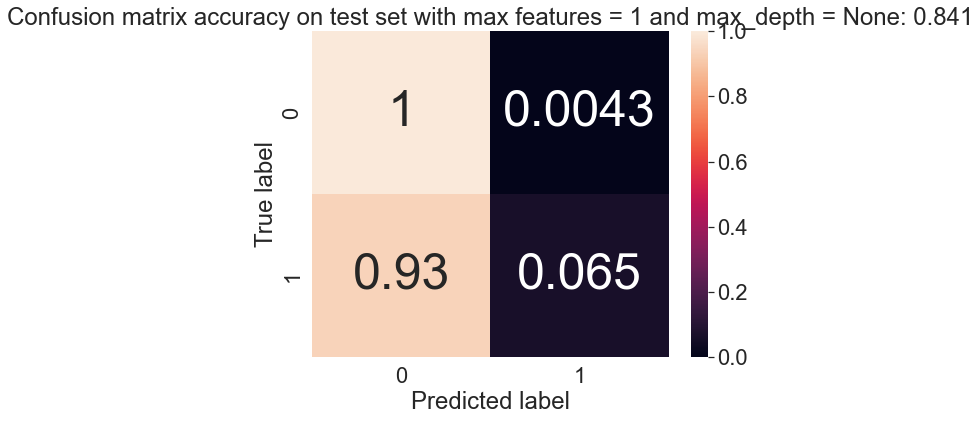

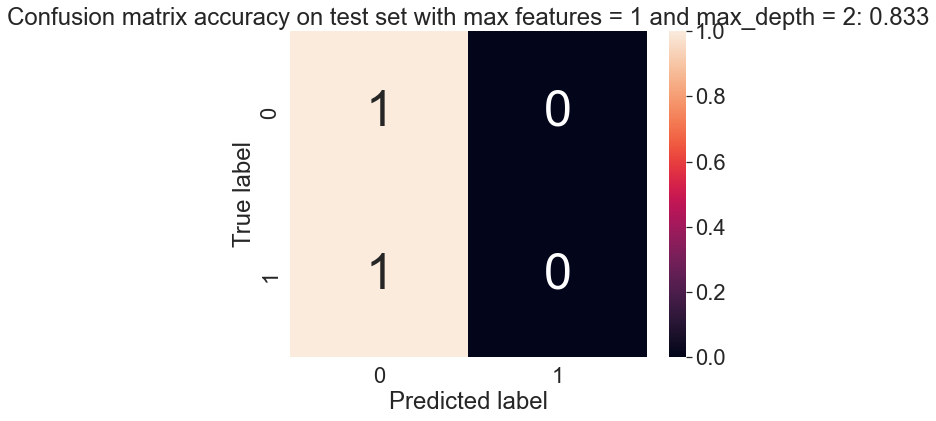

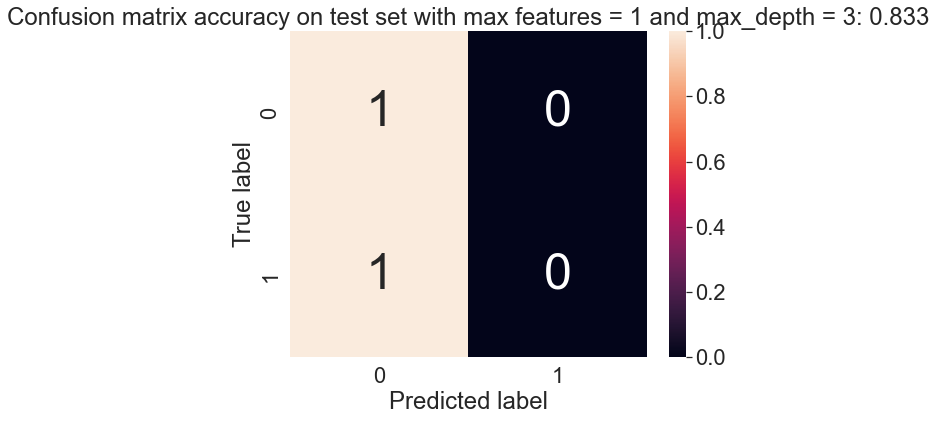

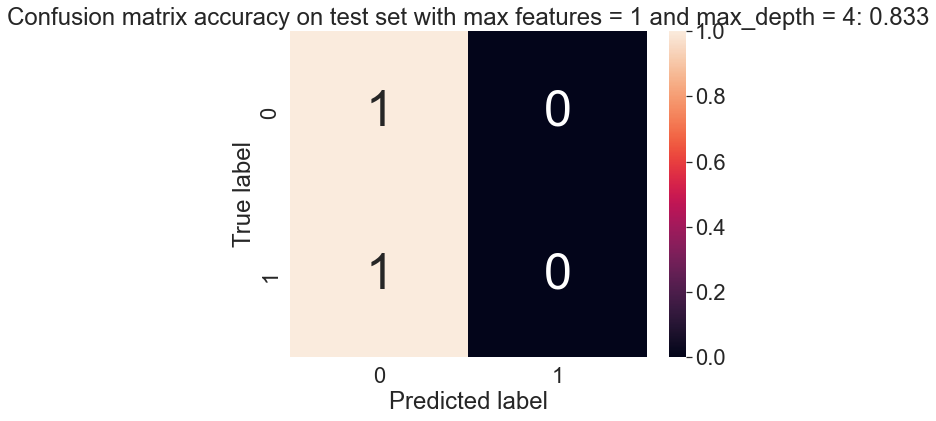

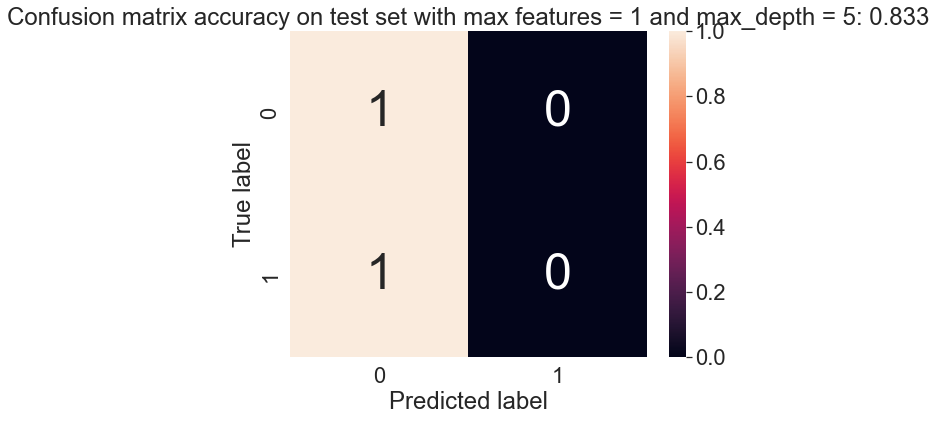

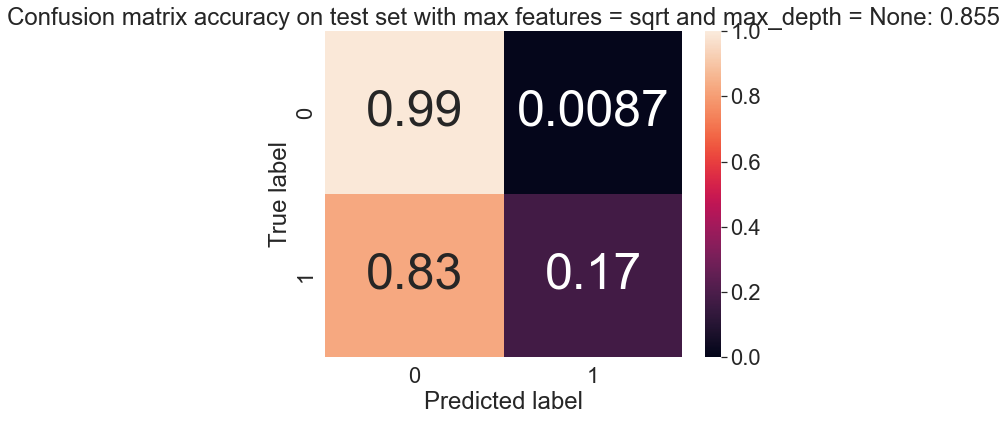

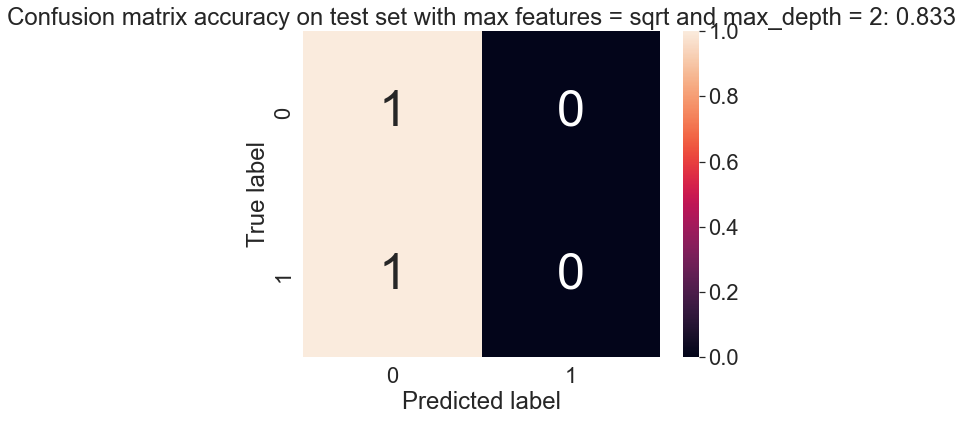

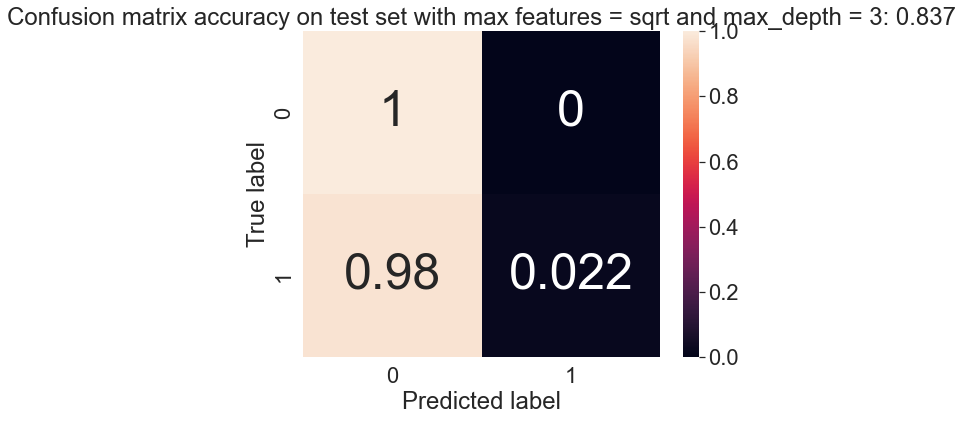

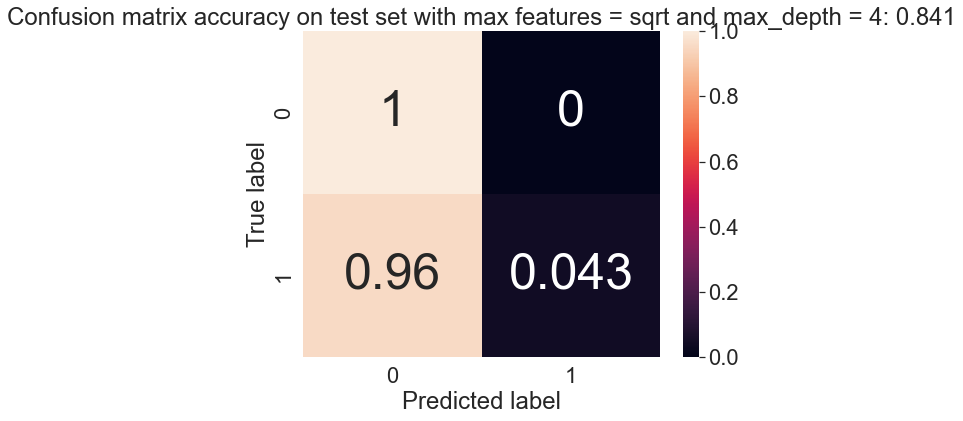

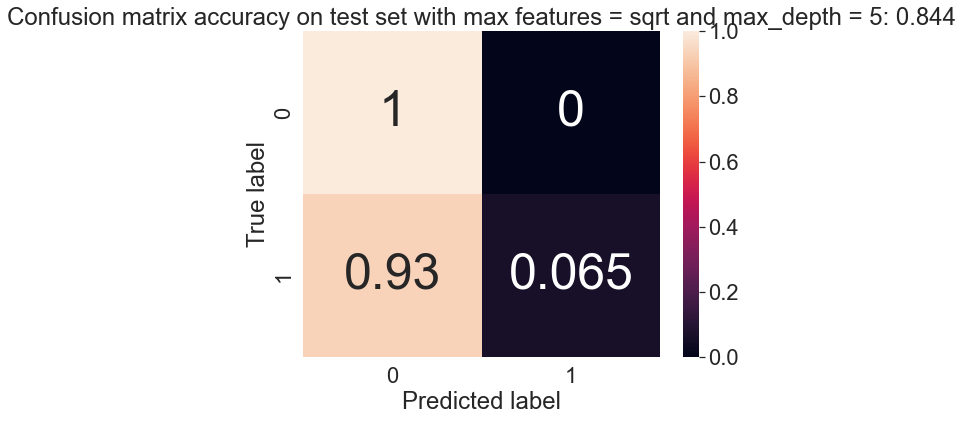

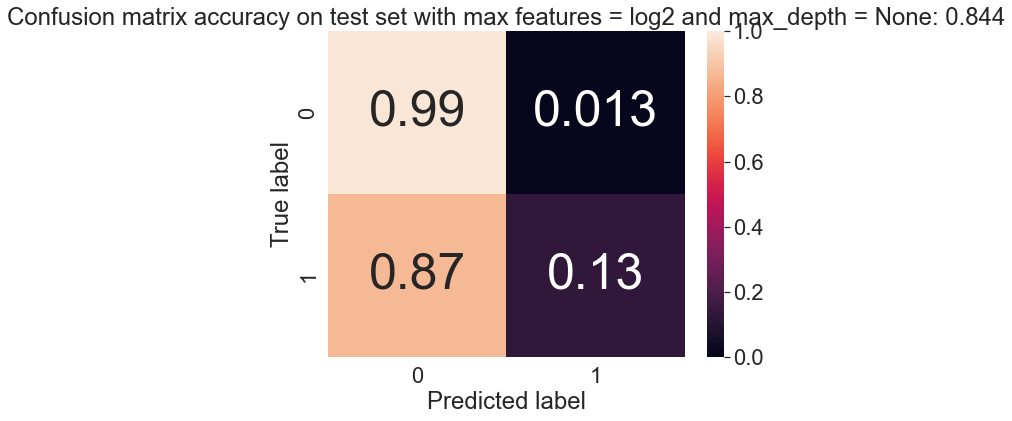

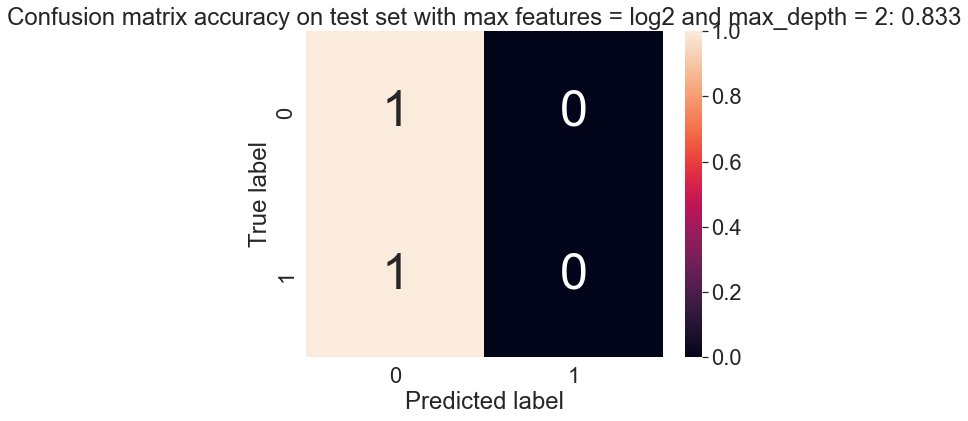

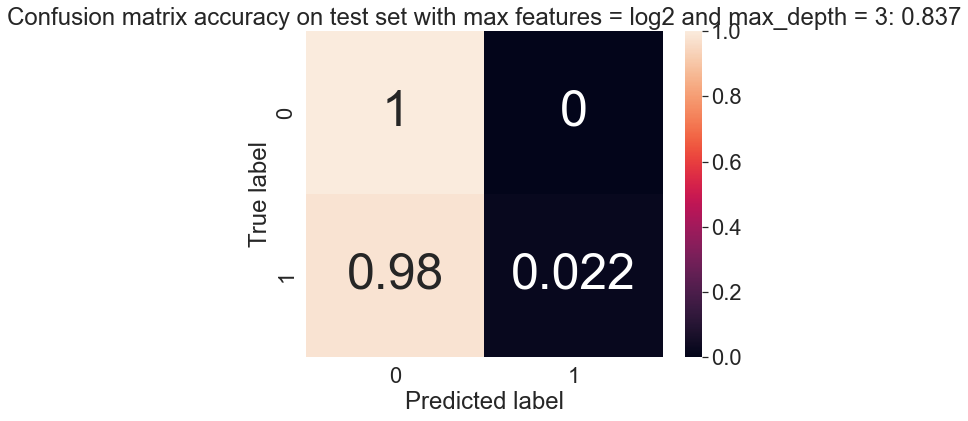

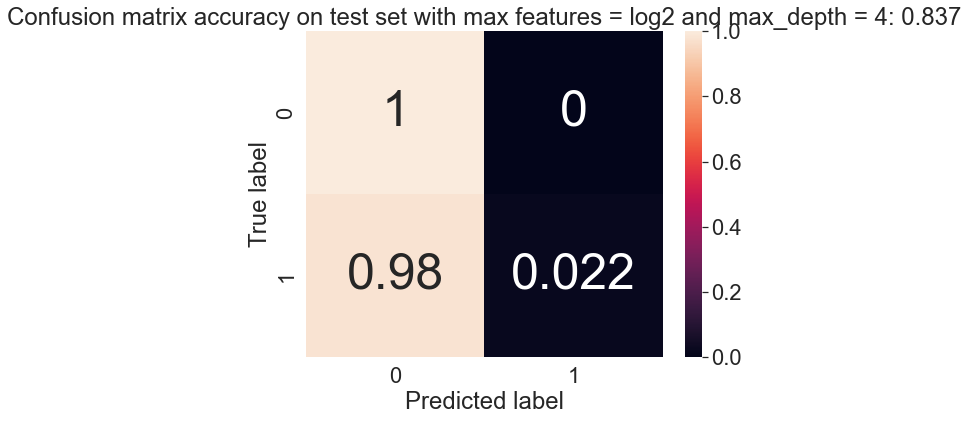

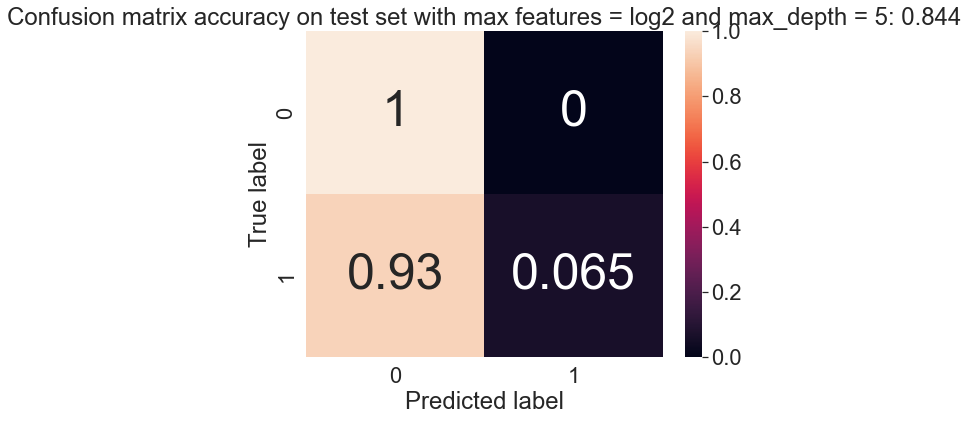

In [33]:
# Tunning random forest to get the best parameters

n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # using product to iterate through all possible combinations
    rf6_select = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=42)
    rf6_select.fit(X6_train, y6_train)
    prediction_test = rf6_select.predict(X=X6_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y6_test,prediction_test)))
    cm = confusion_matrix(y6_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf6_select.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y6_test,prediction_test)))

#### Comments: The best random forest  parameters are max features = sqrt and max_depth = None. The test set classification accuracy is 0.855

Training Accuracy is:  1.0
Testing Accuracy is:  0.855072463768116


<AxesSubplot:>

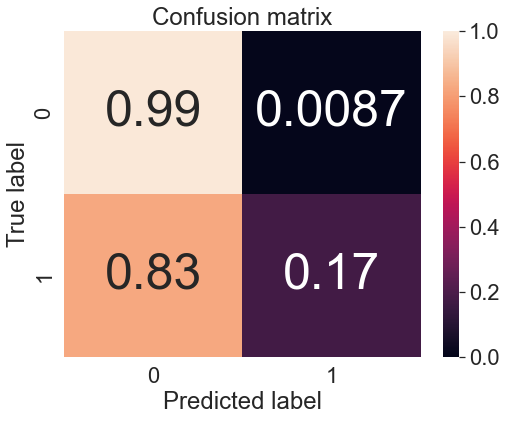

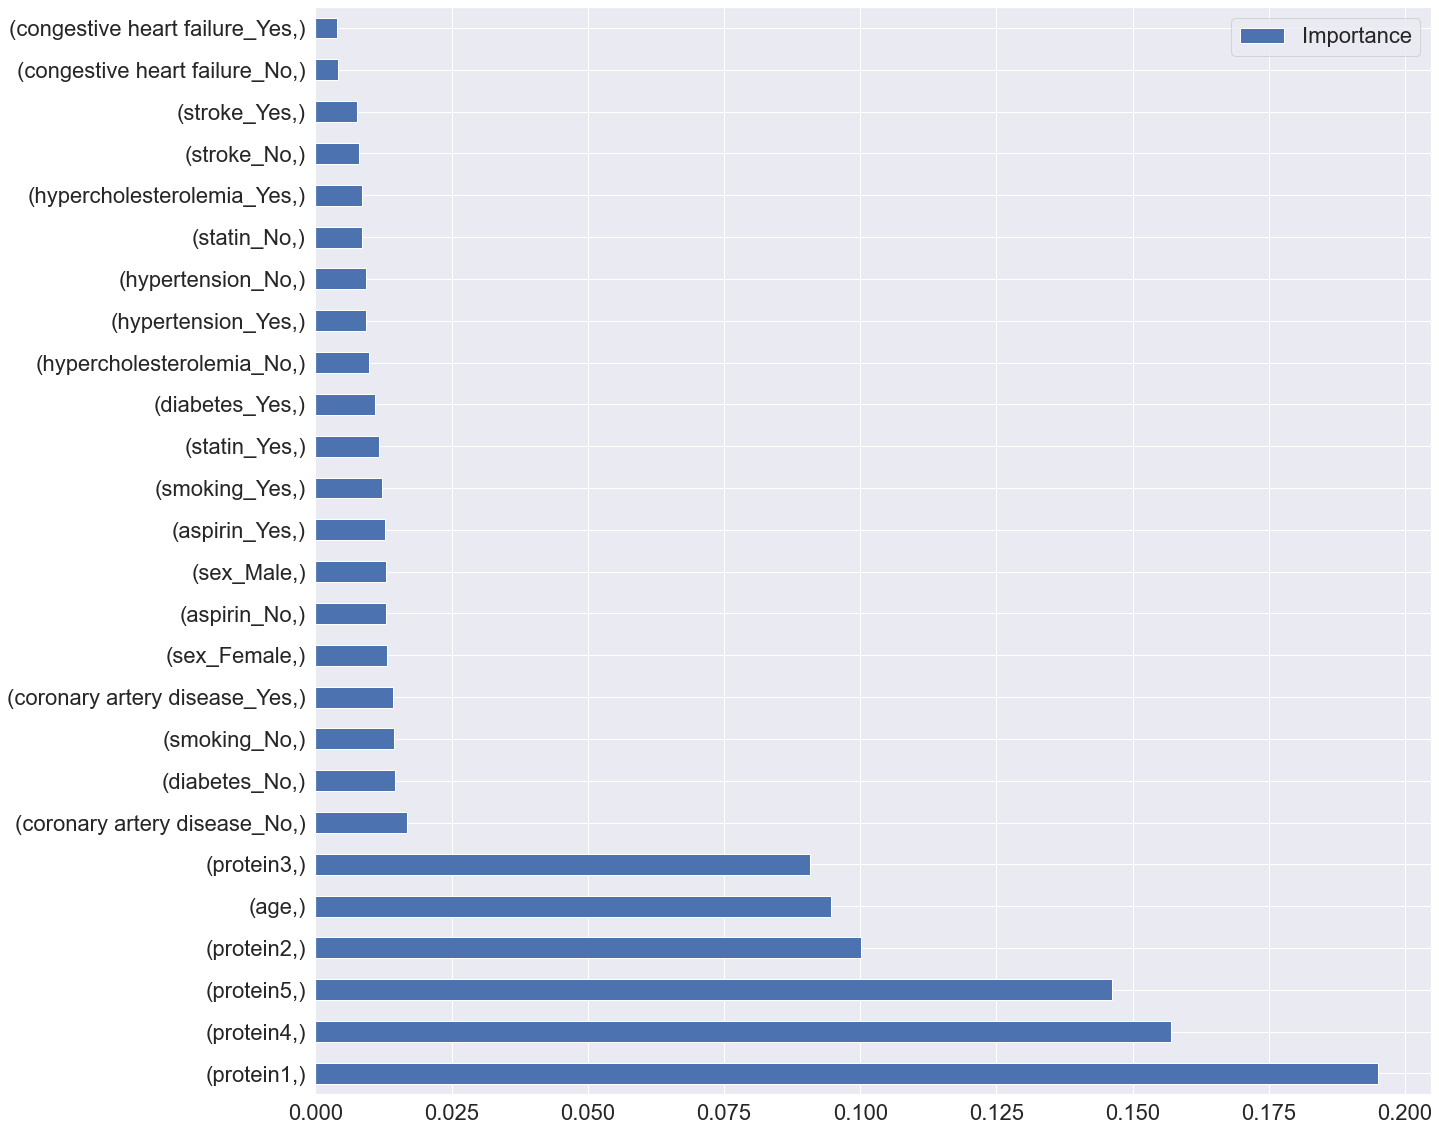

In [34]:
# using the parameters from previous step to calculate model performance.

rf6 = RandomForestClassifier(n_estimators=100, criterion='entropy', 
                                max_features= 'sqrt', 
                                max_depth= None, 
                                n_jobs=2,
                                random_state=42)
rf6.fit(X6_train, y6_train)
prediction_test = rf6.predict(X=X6_test)
# Accuracy on Test
print("Training Accuracy is: ", rf6.score(X6_train, y6_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf6.score(X6_test, y6_test))

# Confusion Matrix
cm = confusion_matrix(y6_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf6.classes_)

sns.set(font_scale = 2)

# Getting the coefficients of the best model into a data frame
coef_rf6 = pd.DataFrame(rf6.feature_importances_)
coef_rf6 = coef_rf6.T
coef_rf6.columns = [X6_train.columns]

# Transposing the data frame to build a bar chart
coef_rf6 = coef_rf6.T

coef_rf6.rename(columns = {0:'Importance'}, inplace = True)

# Plotting the coefficients of the random forest best model
coef_rf6 = coef_rf6.sort_values(by="Importance",ascending=False)
coef_rf6.plot.barh(figsize=(20,20))

---------

#### 4.2.3 Outcome 7

Classification accuracy on test set with max features = 1 and max_depth = None: 0.797
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.768
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.768
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.768
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.772
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.833
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.772
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.808
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.830
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.830
Classification accuracy on test set with max features = log2 and max_depth = None: 0.830
Classification accuracy on test set with max features = log2

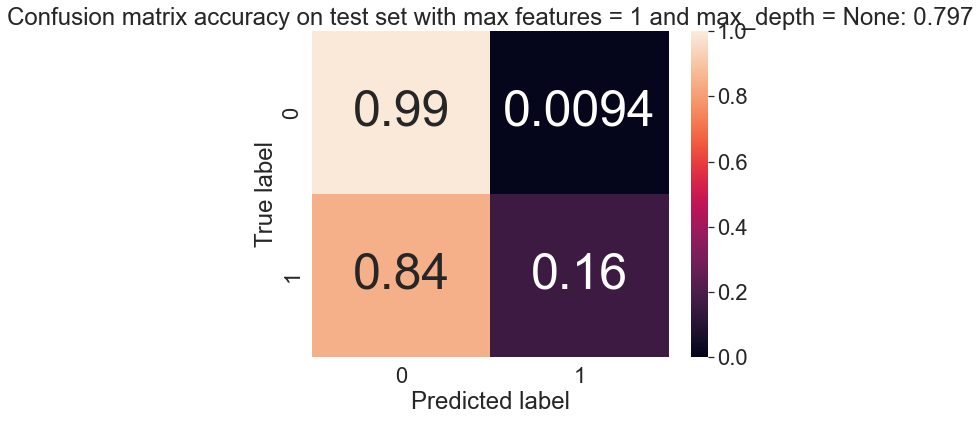

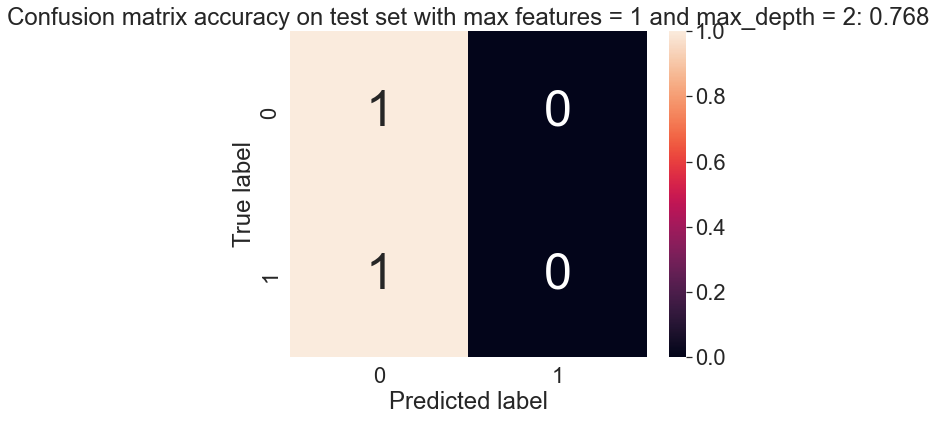

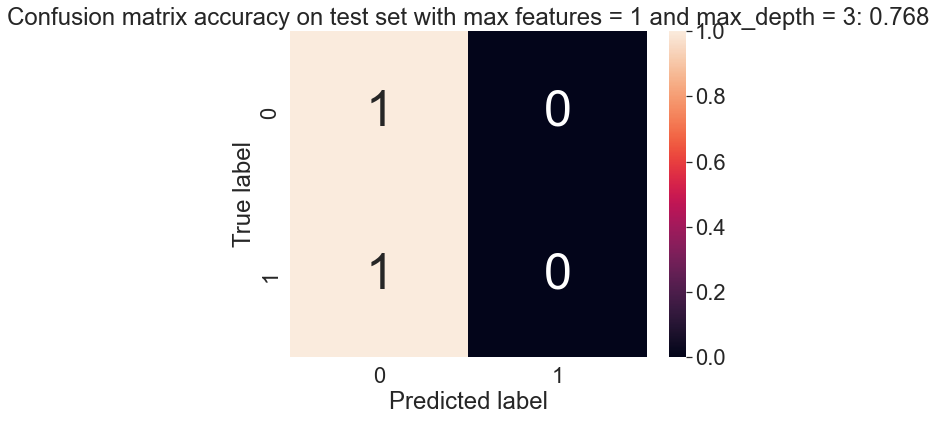

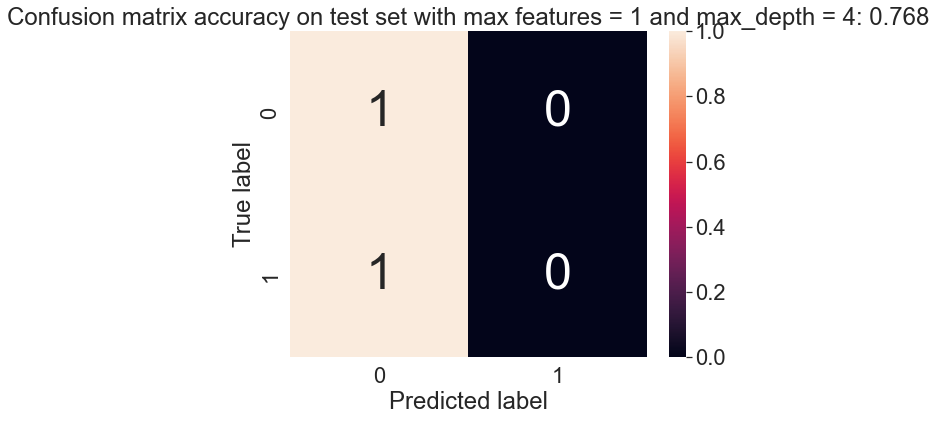

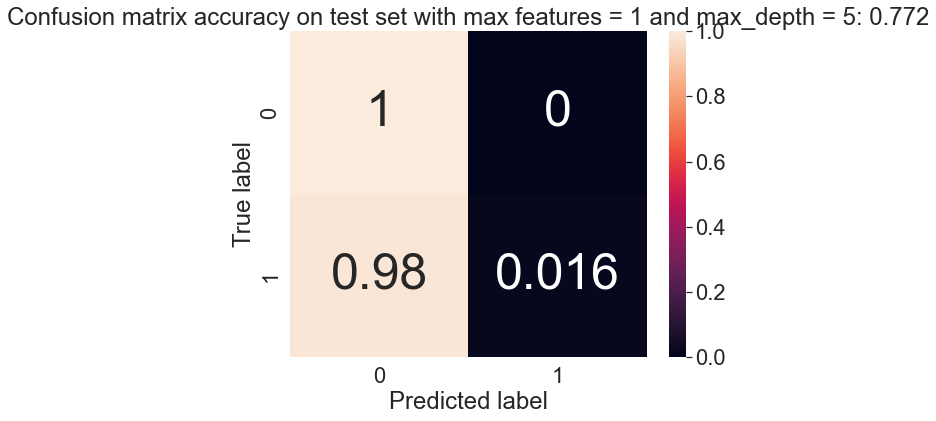

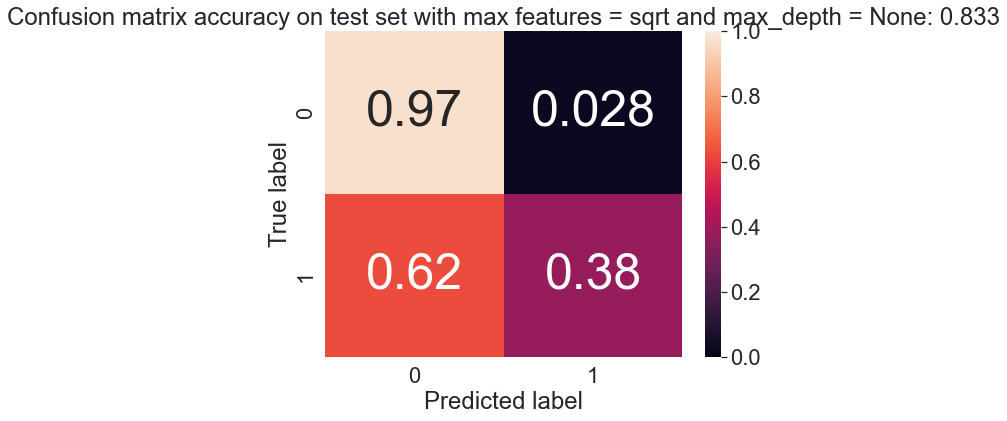

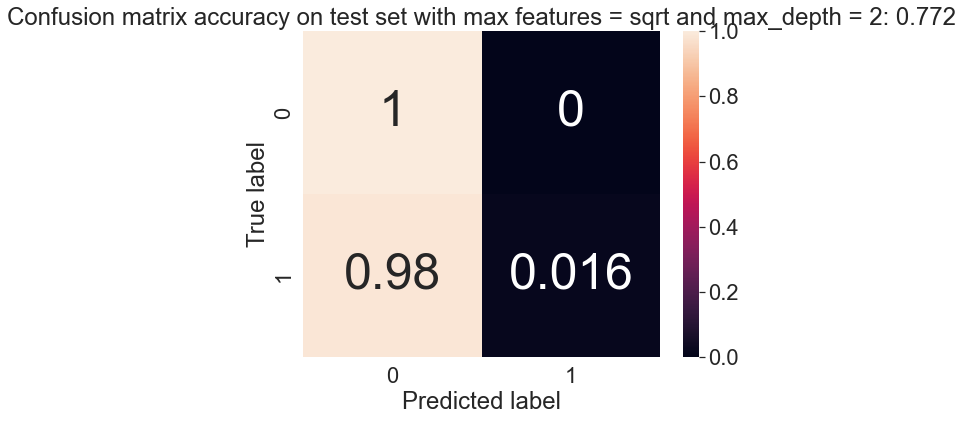

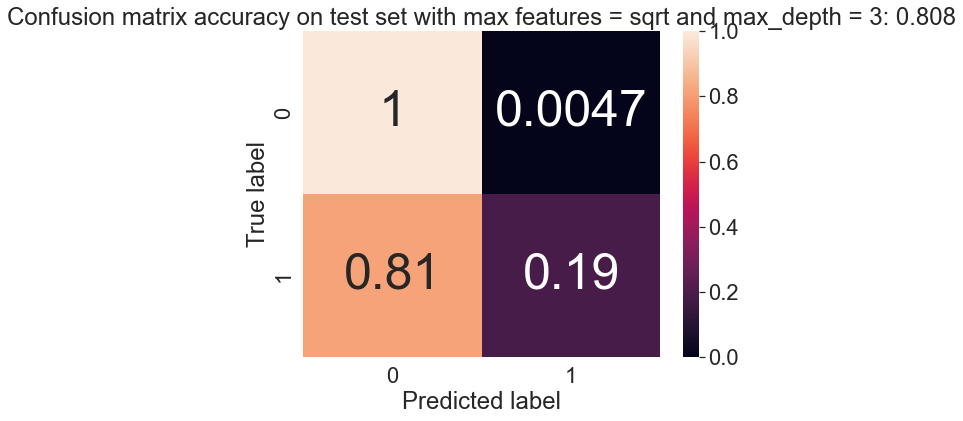

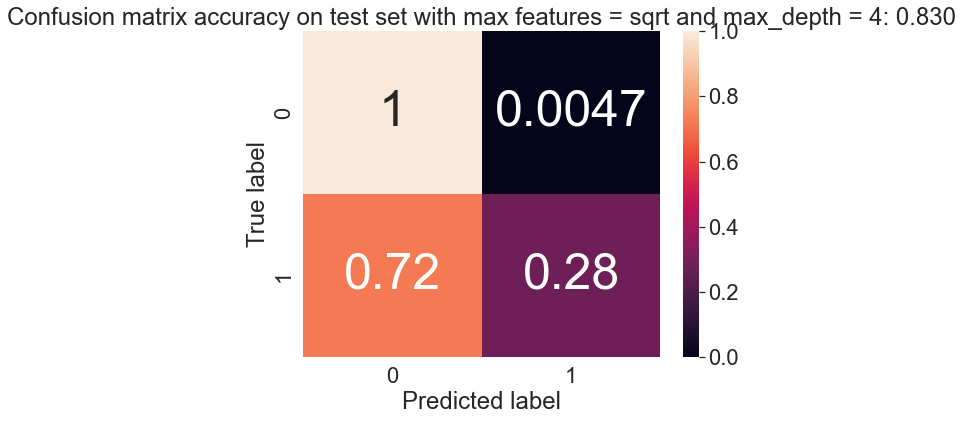

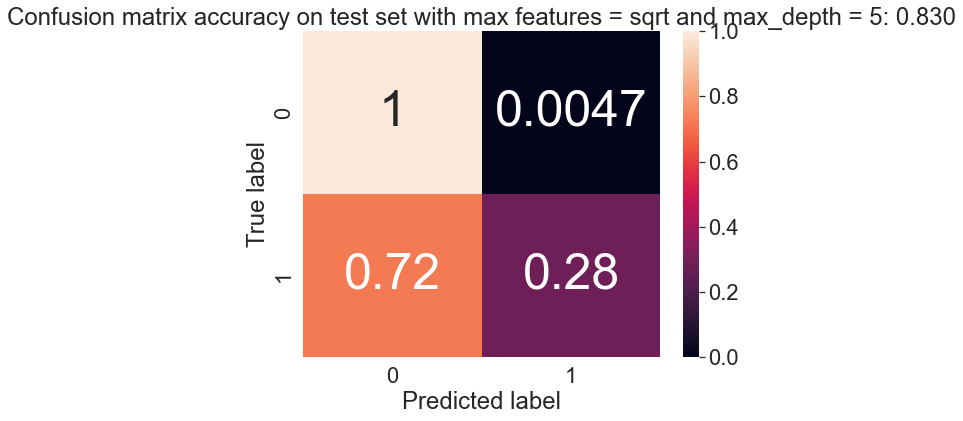

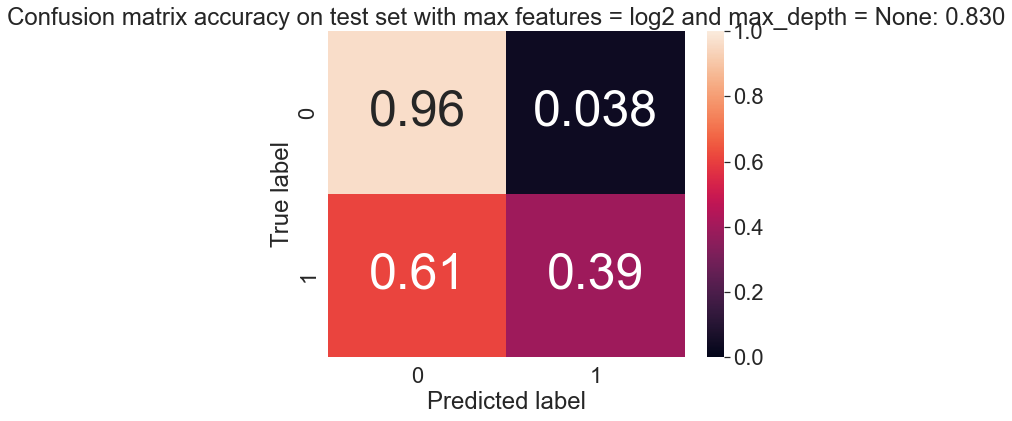

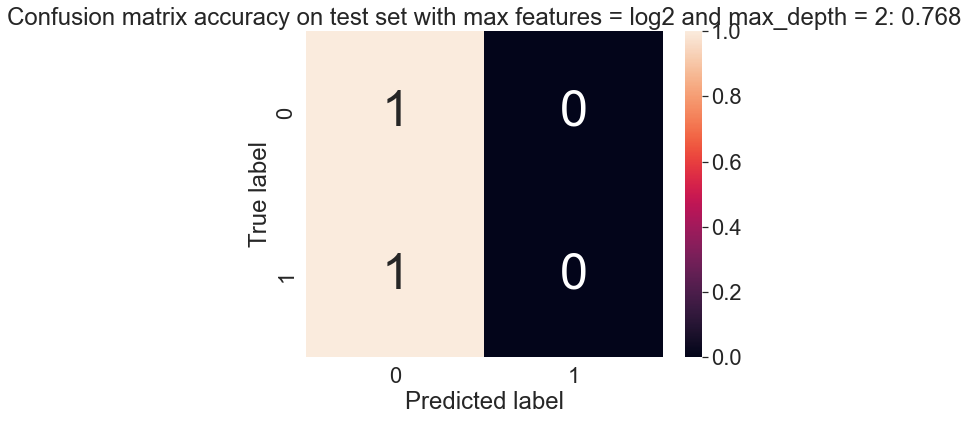

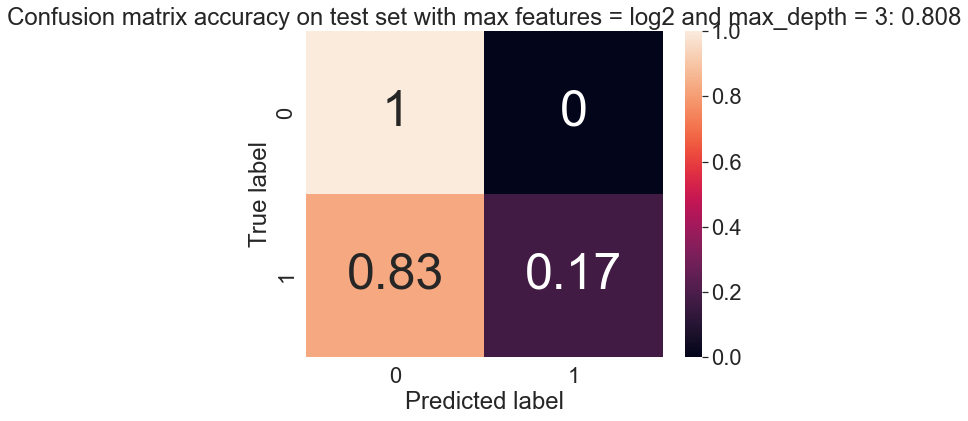

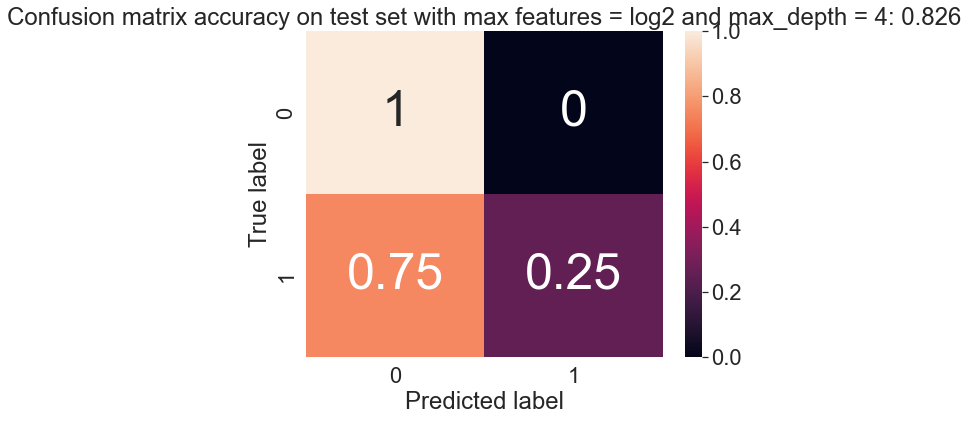

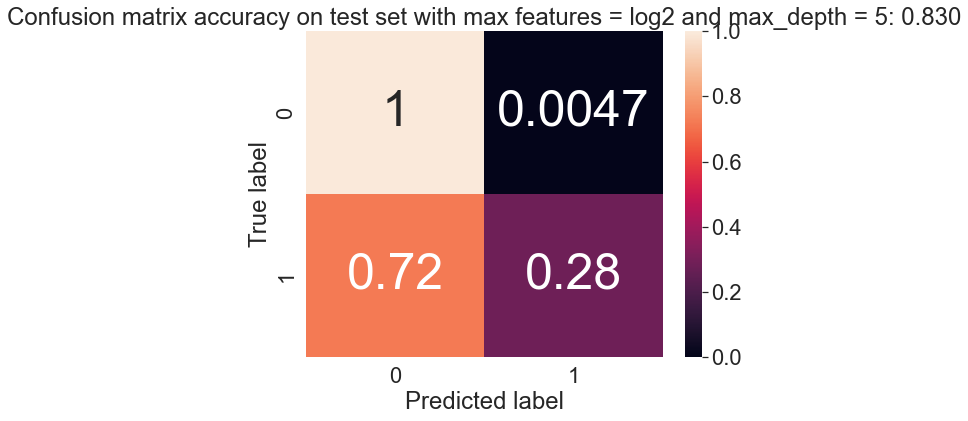

In [35]:
# Tunning random forest to get the best parameters

n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # using product to iterate through all possible combinations
    rf7_select = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=42)
    rf7_select.fit(X7_train, y7_train)
    prediction_test = rf7_select.predict(X=X7_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y7_test,prediction_test)))
    cm = confusion_matrix(y7_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf7_select.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y7_test,prediction_test)))

#### Comments: The best random forest  parameters are max features = sqrt and max_depth = None. The test set classification accuracy is 0.833

Training Accuracy is:  1.0
Testing Accuracy is:  0.8333333333333334


<AxesSubplot:>

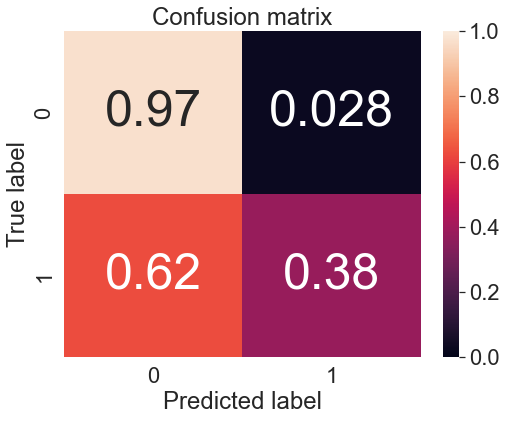

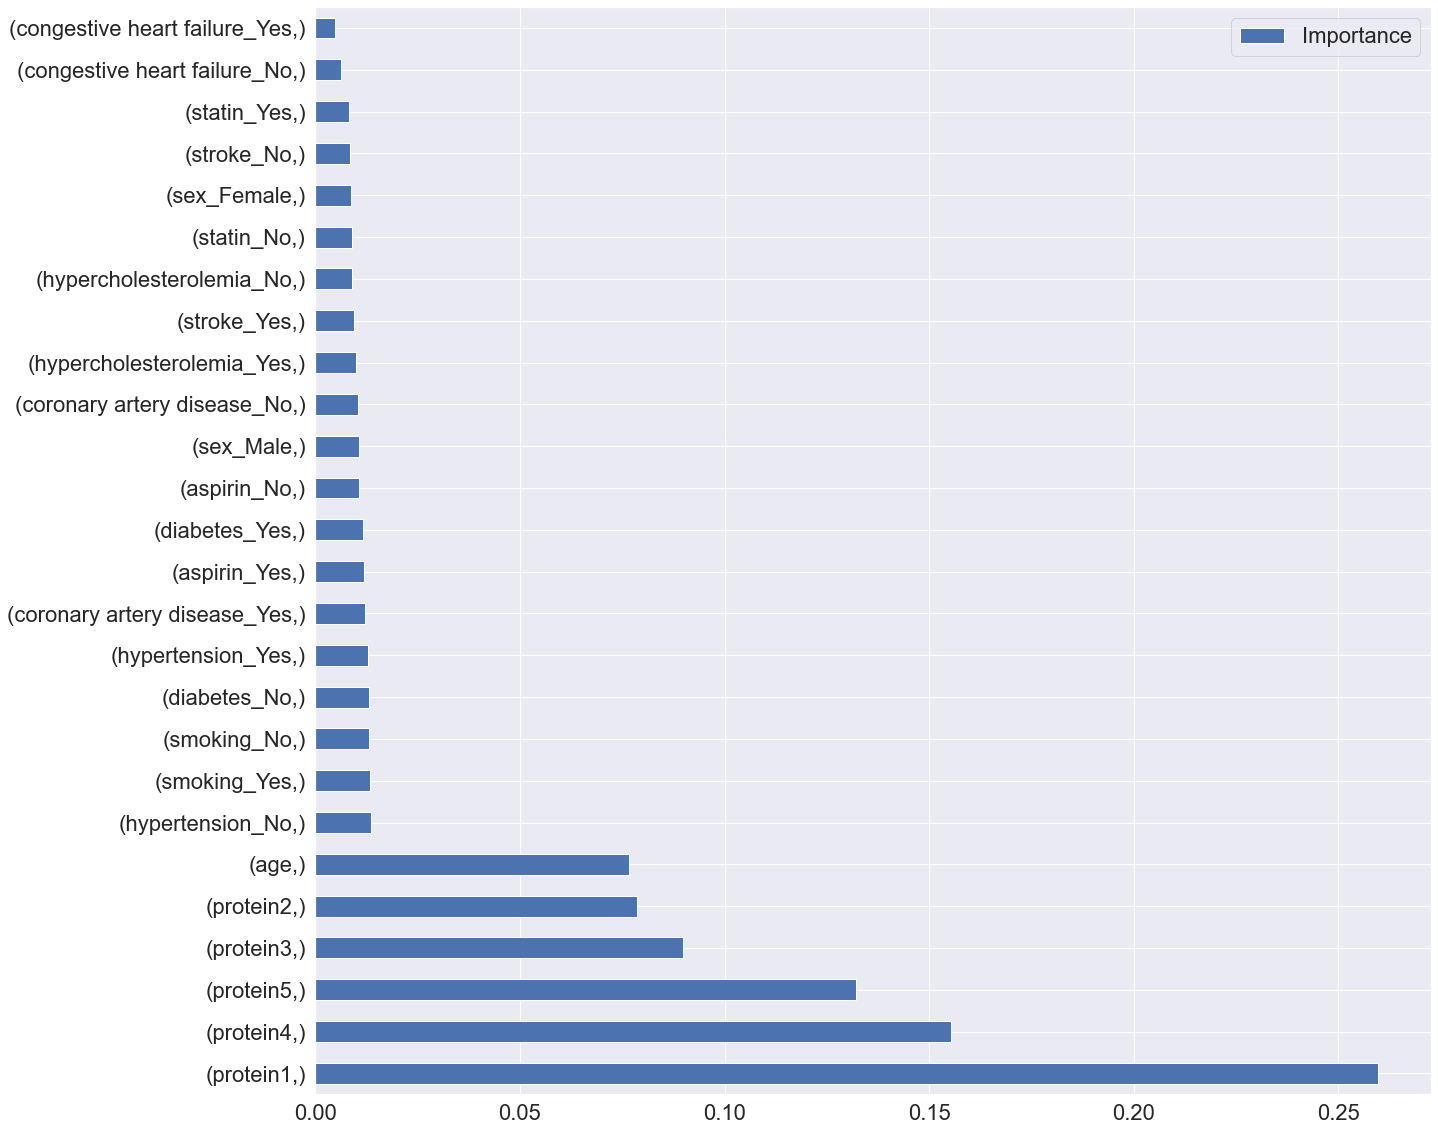

In [36]:
# using the parameters from previous step to calculate model performance.

rf7 = RandomForestClassifier(n_estimators=100, criterion='entropy', 
                                max_features= 'sqrt', 
                                max_depth= None, 
                                n_jobs=2,
                                random_state=42)
rf7.fit(X7_train, y7_train)
prediction_test = rf7.predict(X=X7_test)
# Accuracy on Test
print("Training Accuracy is: ", rf7.score(X7_train, y7_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf7.score(X7_test, y7_test))

# Confusion Matrix
cm = confusion_matrix(y7_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf7.classes_)

sns.set(font_scale = 2)

# Getting the coefficients of the best model into a data frame
coef_rf7 = pd.DataFrame(rf7.feature_importances_)
coef_rf7 = coef_rf7.T
coef_rf7.columns = [X7_train.columns]

# Transposing the data frame to build a bar chart
coef_rf7 = coef_rf7.T

coef_rf7.rename(columns = {0:'Importance'}, inplace = True)

# Plotting the coefficients of the random forest best model
coef_rf7 = coef_rf7.sort_values(by="Importance",ascending=False)
coef_rf7.plot.barh(figsize=(20,20))

-------

#### 4.2.4 Outcome 9

Classification accuracy on test set with max features = 1 and max_depth = None: 0.797
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.779
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.779
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.779
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.779
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.812
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.779
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.779
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.779
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.786
Classification accuracy on test set with max features = log2 and max_depth = None: 0.801
Classification accuracy on test set with max features = log2

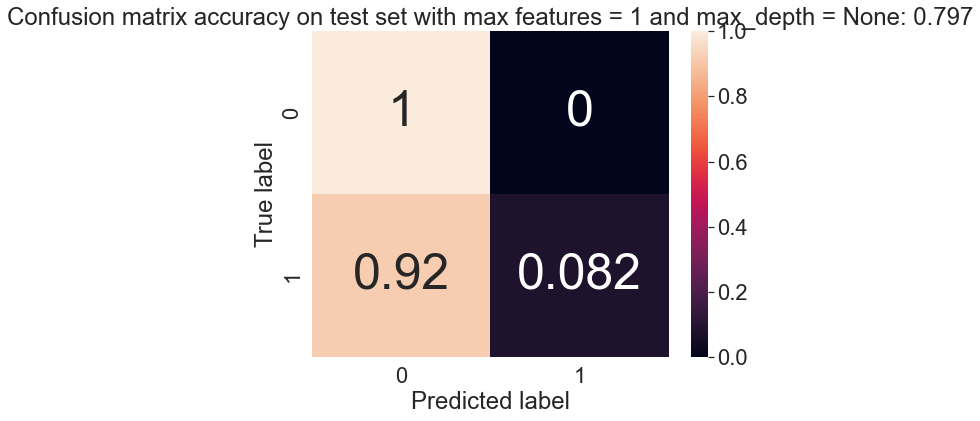

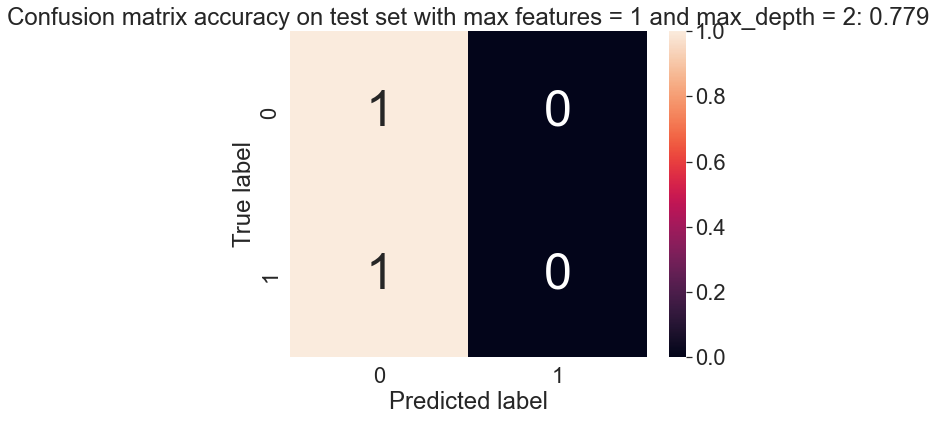

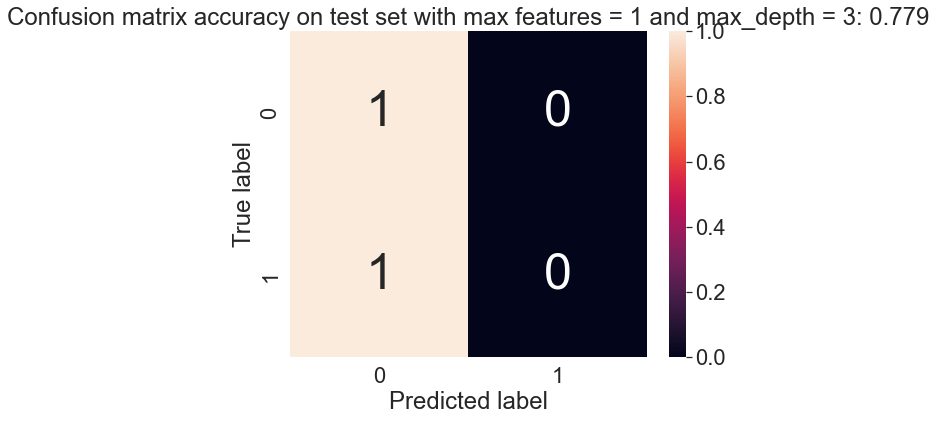

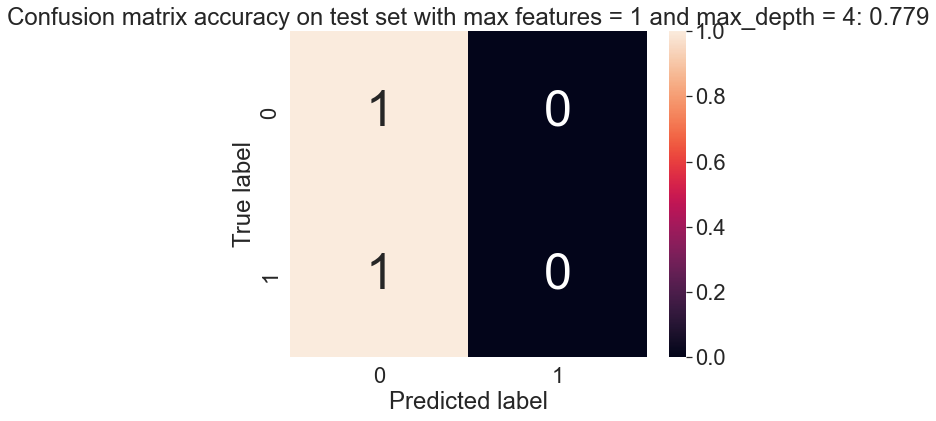

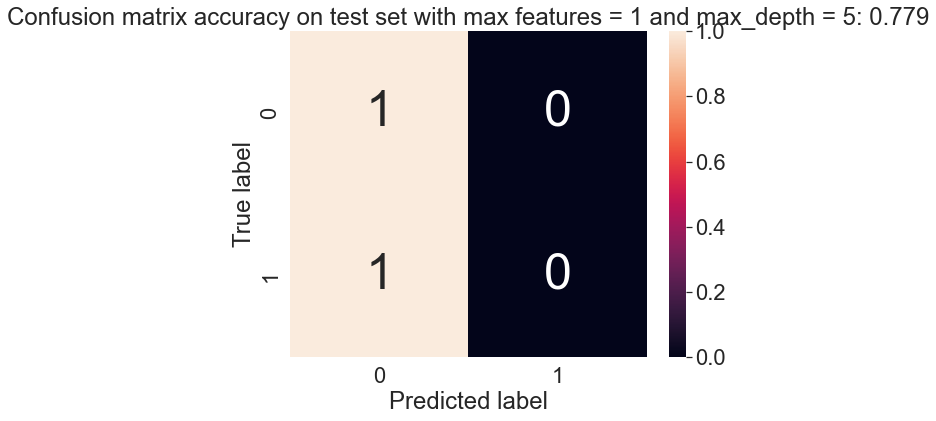

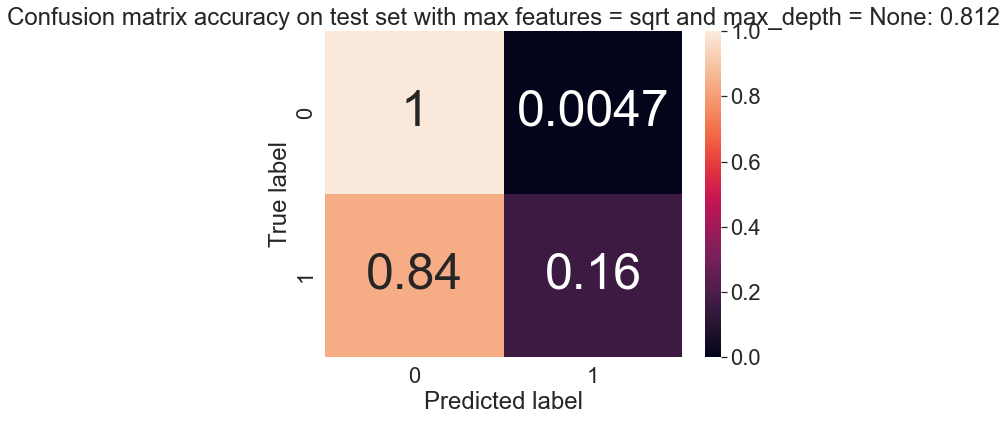

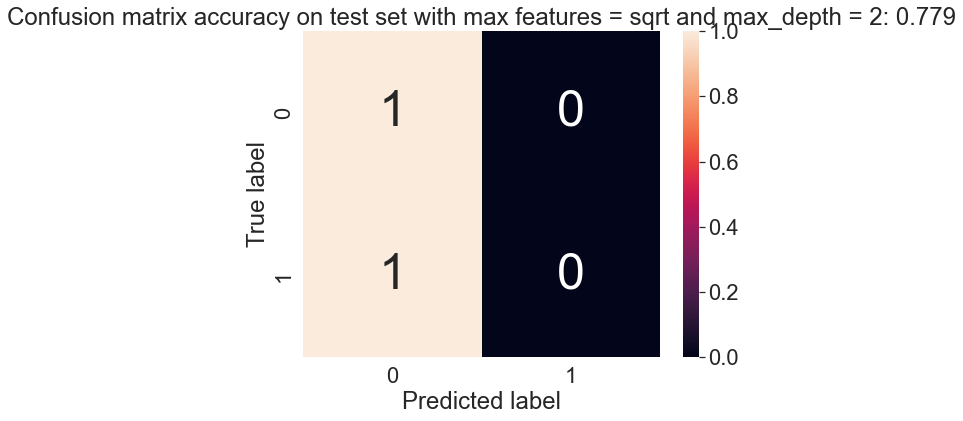

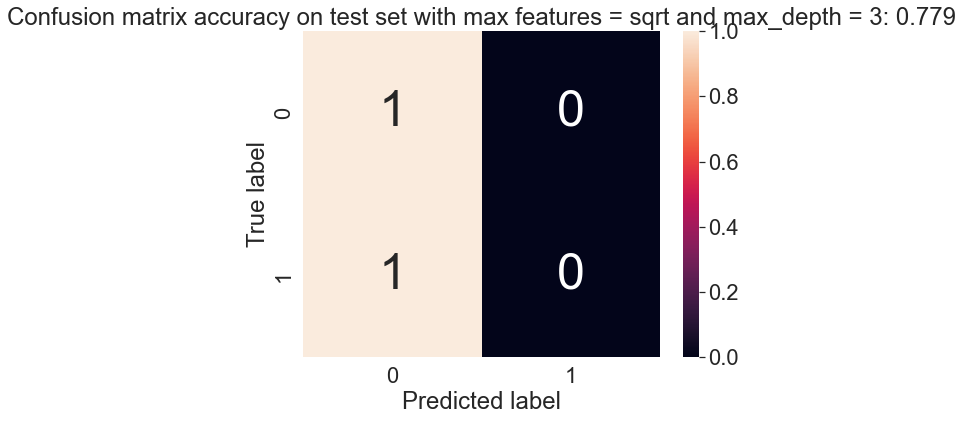

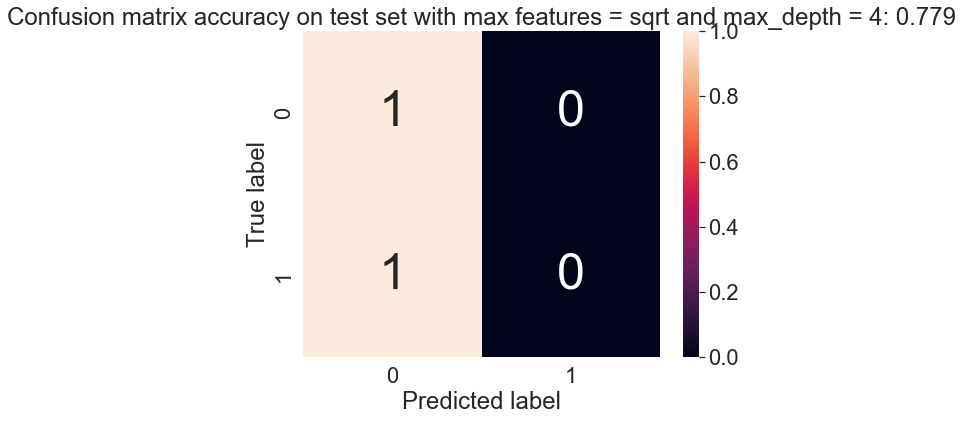

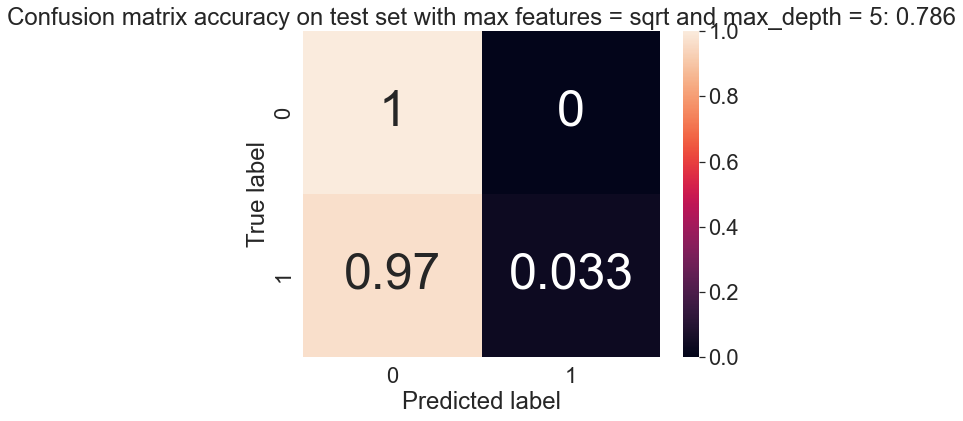

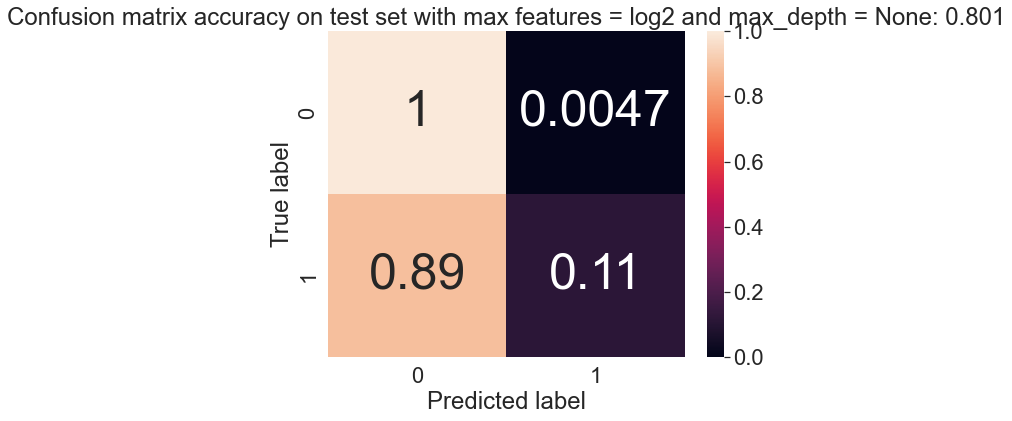

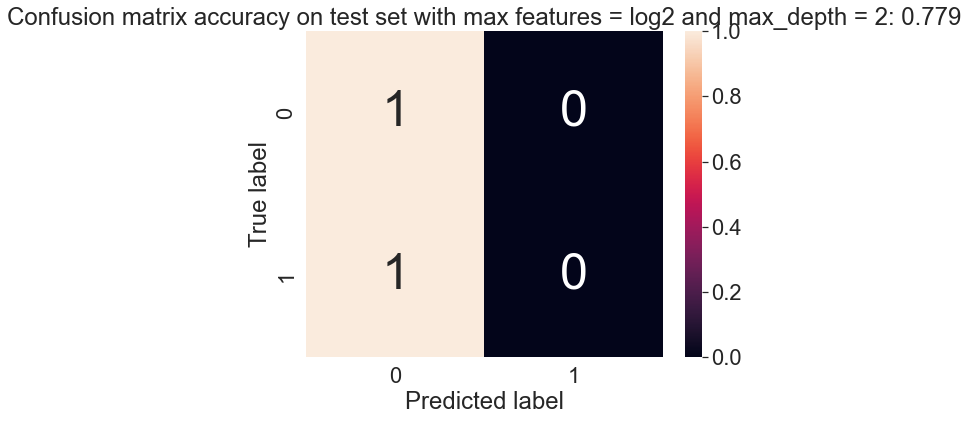

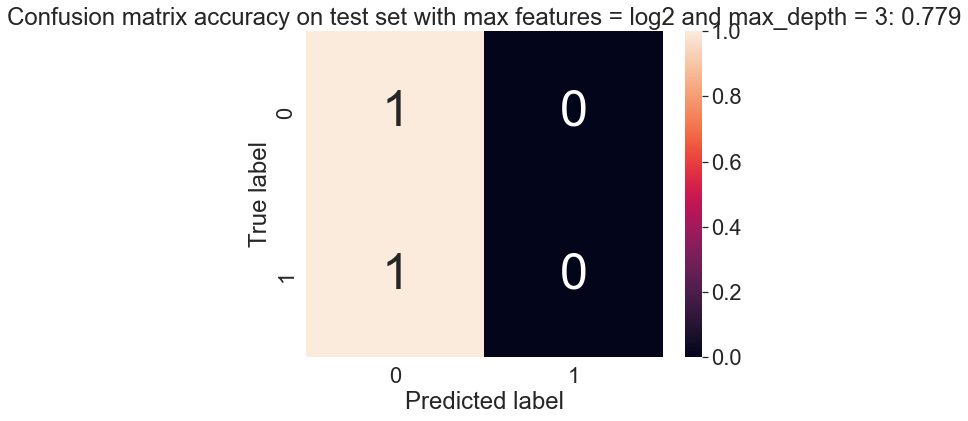

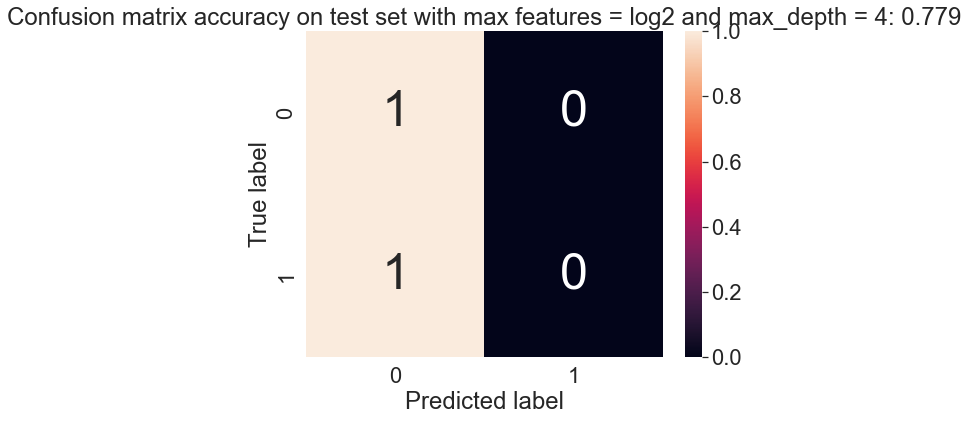

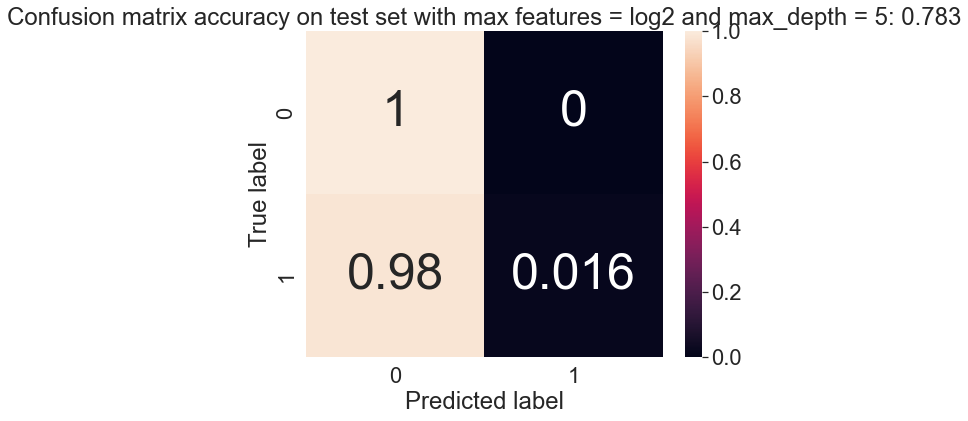

In [37]:
# Tunning random forest to get the best parameters

n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # using product to iterate through all possible combinations
    rf9_select = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=42)
    rf9_select.fit(X9_train, y9_train)
    prediction_test = rf9_select.predict(X=X9_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y9_test,prediction_test)))
    cm = confusion_matrix(y9_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf9_select.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y9_test,prediction_test)))

#### Comments: The best random forest  parameters are max features = sqrt and max_depth = None. The test set classification accuracy is 0.812

Training Accuracy is:  1.0
Testing Accuracy is:  0.8115942028985508


<AxesSubplot:>

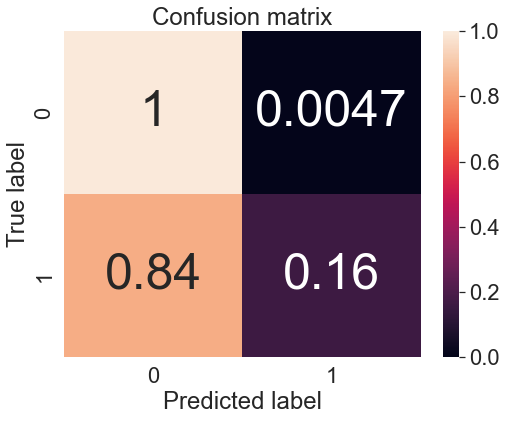

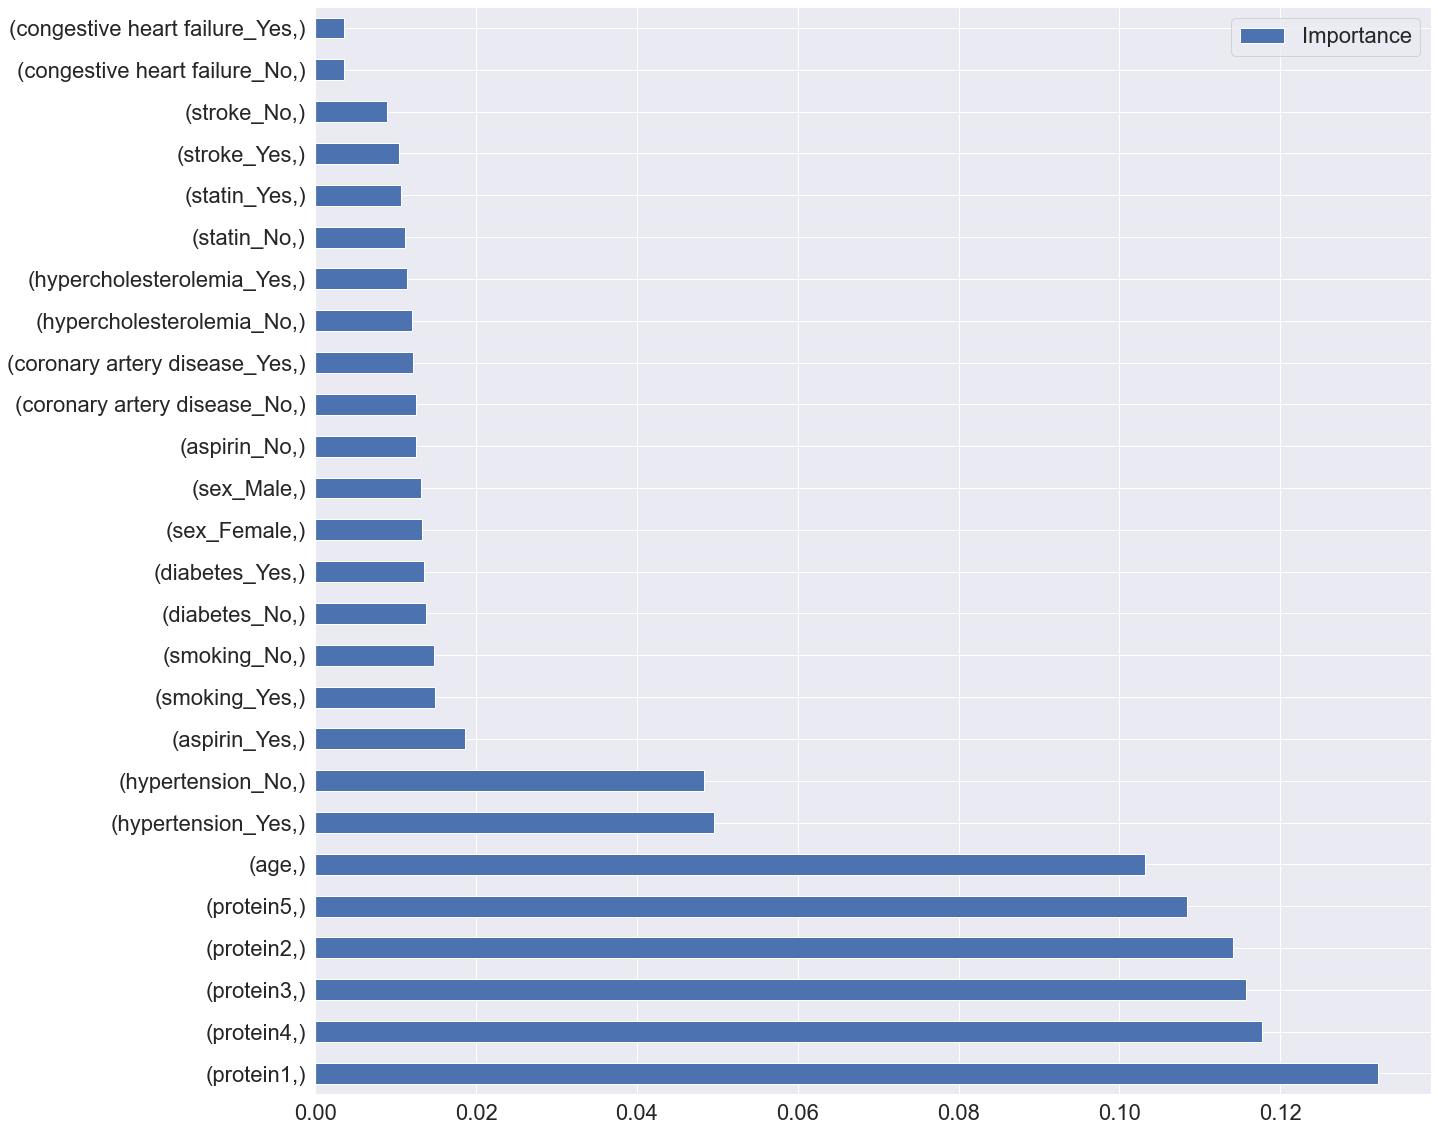

In [38]:
# using the parameters from previous step to calculate model performance.

rf9 = RandomForestClassifier(n_estimators=100, criterion='entropy', 
                                max_features= 'sqrt', 
                                max_depth= None, 
                                n_jobs=2,
                                random_state=42)
rf9.fit(X9_train, y9_train)
prediction_test = rf9.predict(X=X9_test)
# Accuracy on Test
print("Training Accuracy is: ", rf9.score(X9_train, y9_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf9.score(X9_test, y9_test))

# Confusion Matrix
cm = confusion_matrix(y9_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf9.classes_)

sns.set(font_scale = 2)

# Getting the coefficients of the best model into a data frame
coef_rf9 = pd.DataFrame(rf9.feature_importances_)
coef_rf9 = coef_rf9.T
coef_rf9.columns = [X9_train.columns]

# Transposing the data frame to build a bar chart
coef_rf9 = coef_rf9.T

coef_rf9.rename(columns = {0:'Importance'}, inplace = True)

# Plotting the coefficients of the random forest best model
coef_rf9 = coef_rf9.sort_values(by="Importance",ascending=False)
coef_rf9.plot.barh(figsize=(20,20))

-------

--------

## 5. Evaluation – Which model best meets the business objectives?

*Note: The actual model evaluation such as graphs, charts, and accuracy measures should be reported in this step. I preferred to include this with the previous step for easier reading experience.* 

In predicting outcome 8, "the best" random forest model preformed slightly better than "the best" decision tress in all model scores such as accuracy (89% vs. 88%), recall, (89% vs. 88%) and precision (90% vs. 86%). It is also important to note that random forest was successful in including other features than proteins in the final best model. This is important because as mentioned previously, these features are considered confounding features and it is important to take them into consideration in the process of patient classification. 

Since, the CVDs are critical condition, missing out a patient who is at risk is worse than following up with patient who is not at risk. Therefore, the model that can maximize the recall value is the considered the most reliable. The recall for this final random forest was 89%.

As the focus will be on outcome 8, the best model parameters for this outcome were n_estimators=100, criterion='entropy', max features = sqrt and max_depth = 4. The most important proteins that their levels contribute to the risk of developing outcome 8 were protein 4, followed by proteins 1 and 5. History of congestive heart failure and taking aspirin were the minimal contributors to the final model.

Plasma proteins 4, 1, and 5 are important predictors and should be measured along with other features to estimate the risk of outcome 8.

-------

--------

## 6. Deployment – How do stakeholders access the results?

As a data analyst, it is not enough to come up with a reliable model with high performance. It is as important to translate these findings to the public and to provide an easy and convenient way to utilize these findings. 

After ordering a blood test for the patient, healthcare practitioners can use the below interface (accessed online) by answering 16 questions related to the patient's history and current blood work. Then, values are entered next to the corresponding variable name. The best model chosen in the previous step will run through these values and produce a simple and clinically relevant output. The output can be used to make a quick decision in case the patient was found to be at high risk of a certain outcome.

A much more sophisticated interface could done using for example Microsoft Power BI, but this is beyond the scope of this research.

This risk assessment tool can be accessed by healthcare practitioners all over the world, providing better outcomes for patients.

### 6.1 User interface "CVD Risk Calculator"

In [39]:
# An live example of the CVD risk calculator

# What is the level of protein 1
protein1 = 3.1

# Converting the value using standardscaler method in order to fit the model
protein1 = (protein1 - data['protein1'].mean()) / data['protein1'].std()

# What is the level of protein 2
protein2 = 1

# Converting the value using standardscaler method in order to fit the model
protein2 = (protein2 - data['protein2'].mean()) / data['protein2'].std()

# What is the level of protein 3
protein3 = 2

# Converting the value using standardscaler method in order to fit the model
protein3 = (protein3 - data['protein3'].mean()) / data['protein3'].std()

# What is the level of protein 4
protein4 = 3.5

# Converting the value using standardscaler method in order to fit the model
protein4 = (protein4 - data['protein4'].mean()) / data['protein4'].std()

# What is the level of protein 5
protein5 = 4

# Converting the value using standardscaler method in order to fit the model
protein5 = (protein5 - data['protein5'].mean()) / data['protein5'].std()

# What is the patient age in years?
age = 60

# Converting the value using standardscaler method in order to fit the model
age = (age - data['age'].mean()) / data['age'].std()

# What is the patient sex? (0 = male, 1 = female)
female = 0
male = 1

# Does the patient have hypertenion? (0 = No, 1 = Yes)
no_htn = 0
htn = 1

# Does the patient have hypercholesterolemia? (0 = No, 1 = Yes)
no_hc = 1
hc = 0

# Is the patient a diabitic? (0 = No, 1 = Yes)
no_dm = 0
dm = 1


# Is the patient a smoker (0 = No, 1 = Yes)
non_smoker = 1
smoker = 0


# Does the patient has history of cogestive heart failure? (0 = No, 1 = Yes)
no_chf = 0
chf = 1

# Does the patient has history of coronary artery disease? (0 = No, 1 = Yes)
no_cad = 1
cad = 0

# Does the patient has history of stroke? (0 = No, 1 = Yes)
no_stroke = 1
stroke = 0


# Is the patient on statins? (0 = No, 1 = Yes)
no_statin = 0
statin = 1

# Is the patient on aspirin? (0 = No, 1 = Yes)
no_asa = 1
asa = 0

### End of the user interface 

---------

In [40]:
# Predicting the class of the patient given his/her features

outcome8 = rf8.predict([[protein1, protein2, protein3, protein4,protein5,
                        age,male,female,no_htn,htn,no_hc,hc,no_dm,dm,non_smoker,smoker,no_chf,chf,
                        no_cad,cad,no_stroke,stroke,no_statin,statin,no_asa,asa]])

outcome6 = rf6.predict([[protein1, protein2, protein3, protein4,protein5,
                        age,male,female,no_htn,htn,no_hc,hc,no_dm,dm,non_smoker,smoker,no_chf,chf,
                        no_cad,cad,no_stroke,stroke,no_statin,statin,no_asa,asa]])

outcome7 = rf7.predict([[protein1, protein2, protein3, protein4,protein5,
                        age,male,female,no_htn,htn,no_hc,hc,no_dm,dm,non_smoker,smoker,no_chf,chf,
                        no_cad,cad,no_stroke,stroke,no_statin,statin,no_asa,asa]])
outcome9 = rf9.predict([[protein1, protein2, protein3, protein4,protein5,
                        age,male,female,no_htn,htn,no_hc,hc,no_dm,dm,non_smoker,smoker,no_chf,chf,
                        no_cad,cad,no_stroke,stroke,no_statin,statin,no_asa,asa]])

In [41]:
# Calculating the predicted probability of a patient being in each class given his/her features

outcome8_prob = (rf8.predict_proba([[protein1, protein2, protein3, protein4,protein5,
                        age,male,female,no_htn,htn,no_hc,hc,no_dm,dm,non_smoker,smoker,no_chf,chf,
                        no_cad,cad,no_stroke,stroke,no_statin,statin,no_asa,asa]]))*100

outcome6_prob = (rf6.predict_proba([[protein1, protein2, protein3, protein4,protein5,
                        age,male,female,no_htn,htn,no_hc,hc,no_dm,dm,non_smoker,smoker,no_chf,chf,
                        no_cad,cad,no_stroke,stroke,no_statin,statin,no_asa,asa]]))*100

outcome7_prob = (rf7.predict_proba([[protein1, protein2, protein3, protein4,protein5,
                        age,male,female,no_htn,htn,no_hc,hc,no_dm,dm,non_smoker,smoker,no_chf,chf,
                        no_cad,cad,no_stroke,stroke,no_statin,statin,no_asa,asa]]))*100
outcome9_prob = (rf9.predict_proba([[protein1, protein2, protein3, protein4,protein5,
                        age,male,female,no_htn,htn,no_hc,hc,no_dm,dm,non_smoker,smoker,no_chf,chf,
                        no_cad,cad,no_stroke,stroke,no_statin,statin,no_asa,asa]]))*100

In [42]:
if outcome8_prob[0,1] >= 40: #adjusting the threshold as mentioned previously
 print ("The patient is at risk of outcome 8. Refer to a specialist immediately.", "The risk of outcome 8 is",
        "%.1f" % outcome8_prob[0,1],"%")
else:
 print ("The patient is NOT at risk of outcome 8. No urgent follow-up needed on this outcome.", 
        "The risk of outcome 8 is", "%.1f" % outcome8_prob[0,1],"%")
print("")

if outcome6 == 1:
 print ("The patient is at risk of outcome 6. Refer to a specialist immediately.", "The risk of outcome 6 is",
        "%.1f" % outcome6_prob[0,1],"%")
else:
 print ("The patient is NOT at risk of outcome 6. No urgent follow-up needed on this outcome.", 
        "The risk of outcome 6 is", "%.1f" % outcome6_prob[0,1],"%")
print("")

if outcome7 == 1:
 print ("The patient is at risk of outcome 7. Refer to a specialist immediately.", "The risk of outcome 7 is",
        "%.1f" % outcome7_prob[0,1],"%")
else:
 print ("The patient is NOT at risk of outcome 7. No urgent follow-up needed on this outcome.", 
        "The risk of outcome 7 is", "%.1f" % outcome7_prob[0,1],"%")
print("")

if outcome9 == 1:
 print ("The patient is at risk of outcome 9. Refer to a specialist immediately.", "The risk of outcome 9 is",
        "%.1f" % outcome9_prob[0,1],"%")
else:
 print ("The patient is NOT at risk of outcome 9. No urgent follow-up needed on this outcome.", 
        "The risk of outcome 9 is", "%.1f" % outcome9_prob[0,1],"%")

The patient is at risk of outcome 8. Refer to a specialist immediately. The risk of outcome 8 is 66.1 %

The patient is NOT at risk of outcome 6. No urgent follow-up needed on this outcome. The risk of outcome 6 is 27.0 %

The patient is at risk of outcome 7. Refer to a specialist immediately. The risk of outcome 7 is 70.0 %

The patient is NOT at risk of outcome 9. No urgent follow-up needed on this outcome. The risk of outcome 9 is 21.0 %


--------

---------

## Conclusion

This model is useful in identifying patients with high risk of outcome 8. The benefit of using this model is mainly because of the ease of the testing process. As healthcare practitioners would require a single drop of blood from the patient to be able to make risk assessment. As a result, saving the patient the usually time consuming and in some cases inaccurate diagnostic tests. Also, in terms of predictive ability, this model can flag a patient at risk of outcome 8, thus saving the patient from any complications, and helping the healthcare system in reducing costs through early case management. 

"Prevention is better than cure."

## Next steps
This analysis needs to be repeated as a prospective multi-center study with a higher sample size. Also, an external (unseen) test set need to be used for confirming the results. Moreover, plasma proteins levels should be continuously tracked over time in relation to the outcomes.

After the results are confirmed, a blood test kit needs to be manufactured. This kit will be utilized by lab specialists to measure the protein levels in the blood in a very convenient way.

Then, the user interface or risk calculator can be uploaded online for the public use or can be provided to clinics to be access only by healthcare practitioners.

Other outcomes (CVDs) can be included in the further analysis with a model for each outcome.

The patient can know his/her risk for cardiovascular diseases from a single blood test.

--------

-------

### Thank you for reading my notebook. As a biostatistician working in the medical field, I consider myself privileged to be able to provide these healthcare solutions which aid in understanding critical conditions, improve patients' health, and prevent complications.